<a href="https://colab.research.google.com/github/huynhngoctuongvi811/Bai_toan_du_an/blob/main/B%C3%A0i_to%C3%A1n_D%E1%BB%B1_%C4%91o%C3%A1n_s%E1%BB%B1_h%C3%A0i_l%C3%B2ng_c%E1%BB%A7a_h%C3%A0nh_kh%C3%A1ch_%C4%91%E1%BB%91i_v%E1%BB%9Bi_c%C3%A1c_d%E1%BB%8Bch_v%E1%BB%A5_c%E1%BB%A7a_h%C3%A3ng_h%C3%A0ng_kh%C3%B4ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài toán: Dự đoán sự hài lòng của hành khách đối với các dịch vụ của hãng hàng không.


# 1.Giới thiệu bài toán và bộ dữ liệu

### 1.1. Mô tả bài toán

Bài toán nghiên cứu sử dụng thuật toán học máy để dự đoán mức độ hài lòng (Satisfaction) của hành khách máy bay dựa trên các đặc điểm cá nhân và thông tin chuyến bay. Kết quả dự đoán này giúp các hãng hàng không điều chỉnh và cải thiện dịch vụ, nâng cao trải nghiệm khách hàng.

### 1.2 Giới thiệu bộ dữ liệu

Sử dụng bộ dữ liệu Airline Passenger Satisfaction -  Kaggle với hàng chục nghìn phản hồi của hành khách và hơn 20 biến đặc trưng liên quan đến chuyến bay (ví dụ: giới tính, độ tuổi, loại hành khách, hạng vé, khoảng cách bay, thời gian trễ, các chỉ số hài lòng về Wi-Fi, ăn uống, chỗ ngồi, vệ sinh…) và biến mục tiêu “Satisfaction” (hài lòng, trung lập hoặc không hài lòng)​.

#2.Khám phá dữ liệu ban đầu

### 2.1 Thu thập dữ liệu

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
teejmahal20_airline_passenger_satisfaction_path = kagglehub.dataset_download('teejmahal20/airline-passenger-satisfaction')
print('Hoàn tất tải dữ liệu từ nguồn Kaggle.')
# Đọc dữ liệu--------------------
df_train=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv', encoding='latin1')
df_test=pd.read_csv('//kaggle/input/airline-passenger-satisfaction/test.csv', encoding='latin1')

Hoàn tất tải dữ liệu từ nguồn Kaggle.


In [ ]:
# Gộp dữ liệu
df_ = pd.concat([df_train, df_test], axis=0)
print(f"Dữ liệu đã được tải: {df_.shape[0]} dòng và {df_.shape[1]} cột.")
df_.head(5).T

Dữ liệu đã được tải: 129880 dòng và 25 cột.


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


### 2.2 Kiểm tra dữ liệu

In [ ]:
# Tạo bản sao để tránh thay đổi dữ liệu gốc
df = df_.copy()

In [ ]:
import pandas as pd
info_df = pd.DataFrame({
    "Tên cột": df.columns,
    "Tổng số giá trị": df_.notnull().sum().values,
    "Kiểu dữ liệu": df.dtypes.values
})
print("===== THÔNG TIN CƠ BẢN =====")
print(info_df)

===== THÔNG TIN CƠ BẢN =====
                              Tên cột  Tổng số giá trị Kiểu dữ liệu
0                          Unnamed: 0           129880        int64
1                                  id           129880        int64
2                              Gender           129880       object
3                       Customer Type           129880       object
4                                 Age           129880        int64
5                      Type of Travel           129880       object
6                               Class           129880       object
7                     Flight Distance           129880        int64
8               Inflight wifi service           129880        int64
9   Departure/Arrival time convenient           129880        int64
10             Ease of Online booking           129880        int64
11                      Gate location           129880        int64
12                     Food and drink           129880        int64
13                 

THÔNG TIN CƠ BẢN CỦA DỮ LIỆU
- 129.880 khách hàng hàng không.
- 25 cột đặc trưng bao gồm: Thông tin cá nhân & hành vi hành khách,đánh giá dịch vụ chấm điểm,thông tin chuyến bay,trong đó có cột biến mục tiêu (satisfaction) cho biết khách hàng có hài lòng về chuyến bay không.
+ Thông tin cá nhân & hành vi hành khách:
  - Giới tính (Gender)
  - Loại hành khách (Customer Type) – khách hàng thường xuyên hay không
  - Tuổi (Age)
  - Mục đích di chuyển (Type of Travel) – công việc hay cá nhân
  - Hạng vé (Class) – Eco, Eco Plus, Business
+ Thông tin chuyến bay:
  - Khoảng cách bay (dặm): Flight Distance.
  - Thời gian chuyến bay khởi hành bị trễ (phút):Departure Delay in Minutes
  - Thời gian đến nơi bị trễ (phút): Arrival Delay in Minutes.
+ Đánh giá chi tiết các dịch vụ :
  - Dịch vụ wifi trên máy bay (Inflight wifi service)
  - Thuận tiện giờ bay đến/đi (Departure/Arrival time convenient)
  - Dễ dàng đặt vé online (Ease of Online booking)
  - Vị trí cổng ra máy bay (Gate location)
  - Thức ăn và đồ uống (Food and drink)
  - Lên máy bay online (Online boarding)
  - Độ thoải mái chỗ ngồi (Seat comfort)
  - Giải trí trên máy bay (Inflight entertainment)
  - Dịch vụ trên máy bay (On-board service)
  - Không gian để chân (Leg room service)
  - Xử lý hành lý (Baggage handling)
  - Dịch vụ làm thủ tục (Checkin service)
  - Dịch vụ trên chuyến bay (Inflight service)
  - Độ sạch sẽ (Cleanliness)
+ Biến mục tiêu:
  - Mức độ hài lòng (satisfaction): "satisfied" hoặc "neutral or dissatisfied"



In [ ]:
# Kiểm tra giá trị thiếu
print("===== KIỂM TRA GIÁ TRỊ THIẾU =====")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Số lượng', 'Phần trăm (%)']
print(missing_data[missing_data['Số lượng'] > 0])

# Kiểm tra giá trị trùng lặp
print("===== KIỂM TRA GIÁ TRỊ TRÙNG LẶP =====")
print("Số lượng giá trị trùng lặp:", df.duplicated().sum())

===== KIỂM TRA GIÁ TRỊ THIẾU =====
                          Số lượng  Phần trăm (%)
Arrival Delay in Minutes       393       0.302587
===== KIỂM TRA GIÁ TRỊ TRÙNG LẶP =====
Số lượng giá trị trùng lặp: 0


+ Biến Arrival Delay in Minutes có 393 giá trị thiếu trên tổng số 129.880 bản ghi, tương ứng với 0.30%, là một tỷ lệ rất nhỏ.
  - Với tỷ lệ thiếu dưới 1%, việc xử lý giá trị thiếu có thể đơn giản bằng: Loại bỏ các dòng thiếu (dropna()) dữ liệu thường không ảnh hưởng đáng kể đến phân tích tổng thể.
+ Không có giá trị nào trùng lặp


In [ ]:
# Kiểm tra tỷ lệ hài lòng
if 'satisfaction' in df_.columns:
    print("===== TỶ LỆ HÀI LÒNG  =====")
    print(df_['satisfaction'].value_counts(normalize=True) * 100)

===== TỶ LỆ HÀI LÒNG  =====
satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64


+ Dữ liệu cho thấy:
  - Khoảng 56.55% hành khách không hài lòng hoặc trung lập với trải nghiệm bay (neutral or dissatisfied)
  - Chỉ 43.45% hành khách bày tỏ sự hài lòng (satisfied)
+ Đây là một tỷ lệ không hài lòng khá cao, với hơn một nửa hành khách không hoàn toàn hài lòng, điều này đáng được các hãng hàng không quan tâm để cải thiện chất lượng dịch vụ.
+ Để hiểu rõ hơn nguyên nhân khiến hành khách không hài lòng, ta có thể phân tích sâu theo các biến đặc trưng:
  - Loại hành khách (Customer Type): Khách hàng thường xuyên (Loyal Customer) có hài lòng hơn khách vãng lai không?
  - Mục đích chuyến đi (Type of Travel): Hành khách đi công tác có yêu cầu cao hơn và do đó dễ không hài lòng hơn?
  - Hạng vé (Class): Liệu khách hạng Economy có tỷ lệ không hài lòng cao hơn rõ rệt so với Business?
  - Thời gian trễ (Departure/Arrival Delay in Minutes): Có mối liên hệ giữa sự trễ chuyến và sự không hài lòng?
  - Điểm đánh giá dịch vụ: Các yếu tố như Inflight wifi, Seat comfort, Food and drink có đóng vai trò quan trọng?



# 3.Thống kê và tiền xử lý dữ liệu


### 3.1 Thống kê mô tả

In [ ]:
# Thống kê cho biến dạng object (chuỗi)
print("\nThống kê mô tả cho biến phân loại (object):")
df.describe(include=['object']).T



Thống kê mô tả cho biến phân loại (object):


,count,unique,top,freq
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452


Bảng thống kê tần suất đối với các biến định tính trong bộ dữ liệu hành khách hàng không với quy mô 129.880 mẫu cho thấy một số đặc điểm nổi bật về cấu trúc dữ liệu và phân bố thuộc tính.

Trước hết, xét theo giới tính (Gender), bộ dữ liệu bao gồm hai nhóm là nam và nữ, trong đó nữ giới chiếm tỷ lệ cao hơn, với 65.899 quan sát (tương đương khoảng 50,7%). Tỷ lệ giới tính tương đối cân đối, góp phần đảm bảo tính khách quan và đại diện khi tiến hành các phân tích tiếp theo.

Về loại hình khách hàng (Customer Type), dữ liệu cho thấy phần lớn hành khách thuộc nhóm khách hàng trung thành (Loyal Customer), chiếm 106.100 quan sát (khoảng 81,7%). Điều này phản ánh rõ xu hướng tập trung dịch vụ của các hãng hàng không vào nhóm khách hàng quen thuộc, có thể có ảnh hưởng lớn đến chỉ số hài lòng và hành vi sử dụng dịch vụ.

Tiếp theo, loại hình di chuyển (Type of Travel) chủ yếu là đi công tác (Business travel), chiếm 89.693 trường hợp (xấp xỉ 69%). Đây là yếu tố quan trọng, cho thấy đa số hành khách trong tập dữ liệu là người sử dụng dịch vụ hàng không vì mục đích công việc, đòi hỏi các tiêu chuẩn cao về độ đúng giờ, sự tiện nghi và chất lượng phục vụ.

Liên quan đến hạng ghế (Class), hành khách sử dụng hạng thương gia (Business Class) chiếm ưu thế với 62.160 quan sát (chiếm 47,8%). Điều này phù hợp với tỷ lệ cao của nhóm khách đi công tác và khách hàng trung thành, đồng thời phản ánh mức chi tiêu trung bình cao trong nhóm mẫu.

Cuối cùng, xét đến mức độ hài lòng của hành khách (Satisfaction), số lượng phản hồi ở mức trung lập hoặc không hài lòng (neutral or dissatisfied
trung tính hoặc không hài lòng )
) là 73.452 quan sát (tương ứng 56,5%). Tỷ lệ này cho thấy mức độ hài lòng chung của hành khách vẫn còn khá thấp. Đây là dấu hiệu cảnh báo cho các hãng hàng không về nhu cầu cải thiện chất lượng dịch vụ để nâng cao trải nghiệm khách hàng và giữ chân khách hàng trung thành.

In [ ]:
import pandas as pd
print("Kích thước dữ liệu:", df.shape)
# Thống kê mô tả cho biến số
print("\nThống kê mô tả cho biến số:")
df.describe().T


Kích thước dữ liệu: (129880, 25)

Thống kê mô tả cho biến số:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


-	Biến Unnamed và id đều có 129880 quan sát, phân bố đều và không có giá trị thiếu. Tuy nhiên đây là các biến không cần thiết và không mang ý nghĩa phân tích nên ta sẽ loại bỏ khỏi phân tích mô hình.

- Biến nhân khẩu học: Age

  o	Trung bình: 39.4 tuổi, độ lệch chuẩn: 15.12 → khá phân tán, có cả người rất trẻ (min = 7) và cao tuổi (max = 85).

  o	50% người dùng ≤ 40 tuổi → phần lớn là người trưởng thành.

  o	Có thể phân nhóm tuổi thành: <25, 25–40, 40–60, >60 để phân tích kĩ hơn giúp ích cho quá trình huấn luyện và đánh giá mô hình.

-	Biến liên quan đến chuyến bay: Flight Distance, Departure Delay và Avirral Delay Flight Distance

o	Trung bình ~1190km, có nhiều chuyến ngắn (min = 31km) và rất dài (max = 4983km).

o	Phân phối lệch phải (nhiều chuyến ngắn, ít chuyến rất dài) → cần chuẩn hóa hoặc biến đổi log nếu dùng mô hình.
-	Departure Delay và Arrival Delay

o	Trung bình ~15 phút, nhưng độ lệch chuẩn ~38 phút → nhiễu cao, có nhiều chuyến trễ đến hơn 1500 phút.

o	50% không bị trễ → dữ liệu trễ phân phối lệch phải, nên kiểm tra outliers.
-	Các biến đánh giá dịch vụ (tháng 0–5)

Các biến đánh giá chất lượng dịch vụ gồm:	Inflight wifi service, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure/Arrival time convenient

=>	Nhận xét chung:
-	Phần lớn các biến có trung bình nằm trong khoảng 2.7 – 3.6, cho thấy người dùng có xu hướng trung lập hoặc hài lòng nhẹ.
-	Một số biến như Inflight service, Baggage handling, Seat comfort có mean > 3.5 → người dùng đánh giá cao.
-	Tuy nhiên, cũng tồn tại các đánh giá 0, cho thấy có không ít phản hồi tiêu cực → vì thế ta nên kiểm tra phân phối và đánh dấu khách hàng không hài lòng.


###3.2 Tiền xử lý dữ liệu

In [ ]:
#loại bỏ cột unnamed,id không cần thiết
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
# Xử lí giá trị thiếu
df = df.dropna()
print("Dữ liệu sau khi xử lí giá trị thiếu:",df.isna().sum().sum())

Dữ liệu sau khi xử lí giá trị thiếu: 0


Loại bỏ các cột không cần thiết như Unnamed và id vì đây là các chỉ số không mang giá trị thông tin cho mô hình phân tích, giữ lại sẽ tăng độ phức tạp và gây nhiễu cho mô hình. Sau đó xử lí các giá trị thiếu, đây là bước quan trọng để đảm bảo tính toàn vẹn của dữ liệu, nếu bỏ qua các ô trống, mô hình sẽ gặp lỗi khi huấn luyện hoặc cho kết quả sai lệch. Tiền xử lý dữ liệu giúp đảm bảo dữ liệu đầu vào sạch, đầy đủ và phù hợp, là nền tảng cho việc xây dựng mô hình phân tích chính xác và tin cậy.

In [ ]:
#chuyển biến float về int
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype(int)

In [ ]:
import pandas as pd
import numpy as np

# Danh sách các biến cần xử lý ngoại lệ
columns_to_handle = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Tạo dictionary lưu kết quả thống kê
outlier_summary = {
    'Biến': [],
    'Số lượng ngoại lệ': [],
    'Tỷ lệ (%)': []
}

# Hàm phát hiện ngoại lệ bằng IQR với hệ số 1.5
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (col < lower_bound) | (col > upper_bound)
    return outliers, lower_bound, upper_bound

# Phát hiện và thống kê ngoại lệ
for col in columns_to_handle:
    outliers, lower, upper = detect_outliers(df[col])
    count = outliers.sum()
    percent = 100 * count / len(df)
    outlier_summary['Biến'].append(col)
    outlier_summary['Số lượng ngoại lệ'].append(count)
    outlier_summary['Tỷ lệ (%)'].append(round(percent, 2))

# In bảng thống kê
outlier_df = pd.DataFrame(outlier_summary)
print("===== THỐNG KÊ NGOẠI LỆ CỦA CÁC BIẾN =====")
print(outlier_df.sort_values(by='Tỷ lệ (%)', ascending=False).to_string(index=False))

# Hàm xử lý ngoại lệ bằng clip
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Thực hiện xử lý ngoại lệ
df = handle_outliers(df, columns_to_handle)


===== THỐNG KÊ NGOẠI LỆ CỦA CÁC BIẾN =====
                      Biến  Số lượng ngoại lệ  Tỷ lệ (%)
Departure Delay in Minutes              17970      13.88
  Arrival Delay in Minutes              17492      13.51
           Flight Distance               2847       2.20


- Departure Delay in Minutes & Arrival Delay in Minutes

o Tỷ lệ ngoại lệ cao (~13.5%), chiếm hơn 1/8 tổng dữ liệu → dấu hiệu có nhiều chuyến bị trễ nghiêm trọng hoặc bị ghi nhận bất thường.

o Do bản chất của độ trễ thường không phân phối chuẩn, nên những giá trị lớn (có thể hàng trăm phút) rất dễ trở thành outlier theo IQR hoặc Z-score.

=> Làm ảnh hưởng đến mô hình: gây nhiễu nếu không xử lý. Các mô hình nhạy với outlier như Linear Regression, KNN có thể bị ảnh hưởng mạnh.

- Flight Distance

o Tỷ lệ ngoại lệ thấp hơn, chỉ 2.20%.

o Nguyên nhân chủ yếu do các chuyến bay rất dài (ví dụ >4000 km).



Để xử lý giá trị ngoại lệ, phương pháp IQR (Interquartile Range) được áp dụng. Theo đó, các giá trị nhỏ hơn ngưỡng dưới (lower bound = Q1 - 1.5 * IQR) sẽ được thay thế bằng chính ngưỡng dưới. Tương tự, các giá trị lớn hơn ngưỡng trên (upper bound = Q3 + 1.5 * IQR) sẽ được thay thế bằng ngưỡng trên. Việc thay thế này giúp làm giảm ảnh hưởng tiêu cực của các ngoại lệ quá lớn hoặc quá nhỏ đến kết quả phân tích và mô hình dự báo.

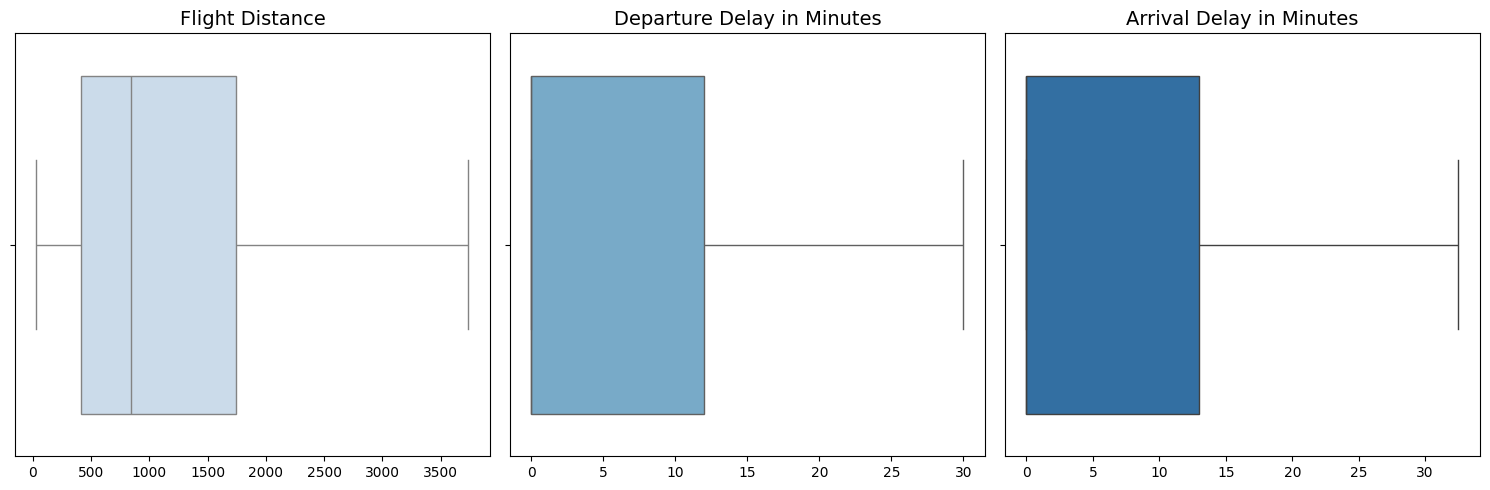

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách các biến số cần vẽ boxplot sau khi xử lý ngoại lệ
numerical = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
blue_palette = sns.color_palette("Blues", n_colors=len(numerical))

# Xác định số hàng và cột cho biểu đồ con
rows = 1
cols = len(numerical)

# Tạo figure
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5))
if len(numerical) == 1:
    axes = [axes]  # Đảm bảo axes là iterable nếu chỉ có 1 biểu đồ

# Vẽ boxplot cho từng biến
for i, col in enumerate(numerical):
    sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")  # Ẩn tên trục x nếu muốn gọn

plt.tight_layout()
plt.show()


Flight Distance

- Phân bố dữ liệu: Phân bố lệch phải (right-skewed), phần lớn các chuyến bay có khoảng cách ngắn.

- Ngoại lệ: Không còn giá trị ngoại lệ nào (tất cả điểm dữ liệu nằm trong whiskers).

Nhận xét:

- Việc xử lý ngoại lệ đã loại bỏ các chuyến bay có khoảng cách cực kỳ lớn.

- Phân bố này phù hợp với thực tế vì đa số các chuyến bay là nội địa hoặc tầm trung.

Departure Delay in Minutes
- Phân bố dữ liệu: Có phần đối xứng, không lệch nhiều.

- Ngoại lệ: Không còn ngoại lệ sau xử lý.

Nhận xét:

- Các giá trị delay khởi hành cao bất thường đã được loại bỏ.

- Khoảng 75% chuyến bay có độ trễ dưới khoảng 12 phút, cho thấy độ tin cậy khá tốt sau làm sạch.

Arrival Delay in Minutes
- Phân bố dữ liệu: Tương tự biến delay khởi hành – gần như đối xứng.

- Ngoại lệ: Không có, đã được xử lý.

Nhận xét:

- Dữ liệu đã được xử lý tốt, loại bỏ các chuyến bay có độ trễ đến quá cao.

- Phần lớn các chuyến bay đến muộn dưới 13 phút, phản ánh chất lượng khai thác ổn định.



In [ ]:
print('Dữ liệu sau khi làm sạch:',df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 non

# 4.Trực quan hóa dữ liệu

##4.1 Phân tích biến mục tiêu

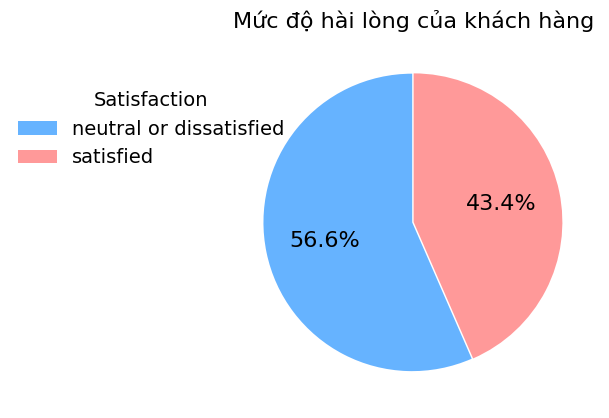

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Tính tần suất mức độ hài lòng
satisfaction_counts = df['satisfaction'].value_counts()
# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(6, 6))
colors = [ '#66b3ff','#ff9999']
wedges, texts, autotexts = ax.pie(
    satisfaction_counts,
    labels=None,  # Ẩn nhãn trực tiếp trên biểu đồ
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
     explode=(0.01,0),
    textprops={'fontsize': 16}
)

# Thêm chú thích (legend) vào trong khung hình
ax.legend(wedges,
          satisfaction_counts.index,
          title="Satisfaction",
          loc="upper right",
          bbox_to_anchor=(0.2, 0.9),
          fontsize=14,
          title_fontsize=14,
          frameon=False)
plt.title("Mức độ hài lòng của khách hàng", fontsize=16)
plt.tight_layout()
plt.show()



##4.2. Phân tích theo thông tin cá nhân & hành vi khách hàng

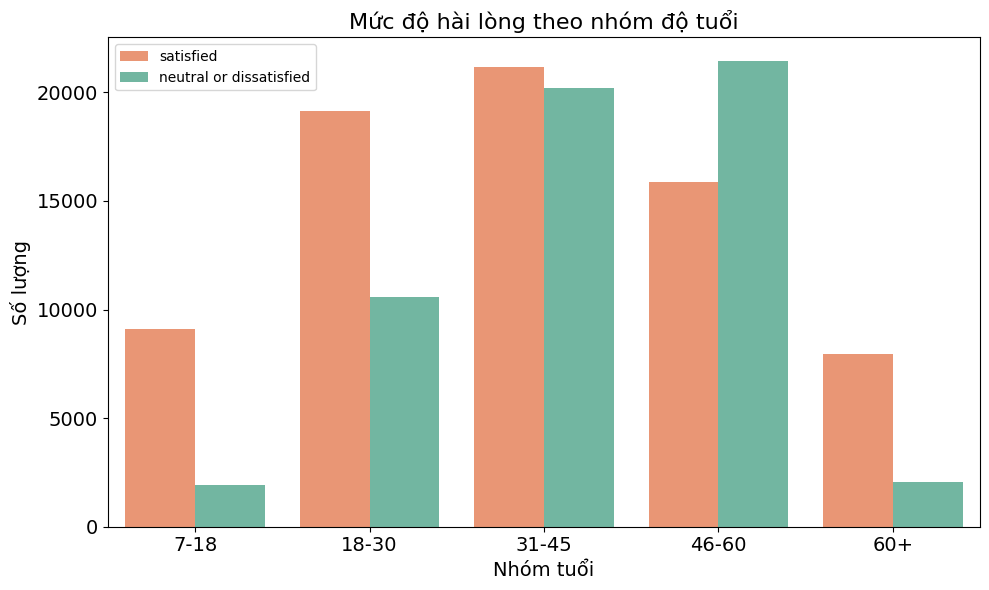

In [ ]:
# Định nghĩa màu cố định cho từng nhãn
satisfaction_colors = {
    'satisfied': '#66c2a5',
    'neutral or dissatisfied': '#fc8d62'
}
# Vẽ biểu đồ mức độ hài lòng theo nhóm độ tuổi mà không thêm cột vào df
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100],
                                 labels=['7-18', '18-30', '31-45', '46-60', '60+']),
              hue='satisfaction', palette=satisfaction_colors)

# Tùy chỉnh tiêu đề và nhãn
plt.title("Mức độ hài lòng theo nhóm độ tuổi", fontsize=16)
plt.xlabel("Nhóm tuổi", fontsize=14)
plt.ylabel("Số lượng", fontsize=14)

# Đặt độ xoay cho nhãn trục X để tránh chồng lấn
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
# Thay đổi tên trong chú thích (legend)
plt.legend(title='', labels=['satisfied', 'neutral or dissatisfied'])
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



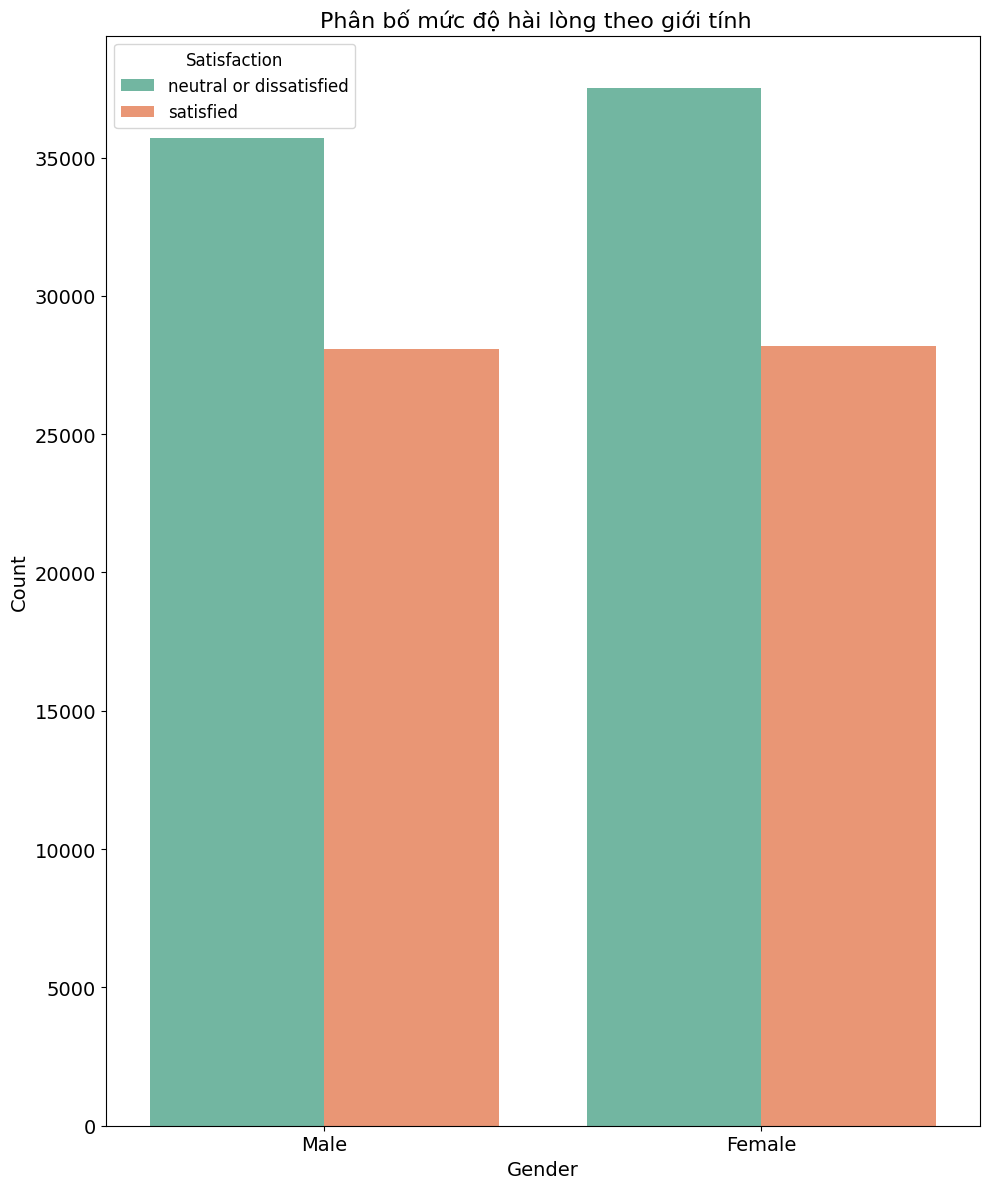

In [ ]:
# Tạo bảng đếm giới tính theo mức độ hài lòng
gender_satisfaction = df.groupby('satisfaction')['Gender'].value_counts().unstack()
# Vẽ biểu đồ cột
plt.figure(figsize=(10,12))
sns.countplot(data=df, x='Gender', hue='satisfaction', palette='Set2')
# Thêm tiêu đề, nhãn và định dạng
plt.title('Phân bố mức độ hài lòng theo giới tính  ', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Satisfaction',loc="best", title_fontsize=12, fontsize=12)
plt.tight_layout()
plt.show()

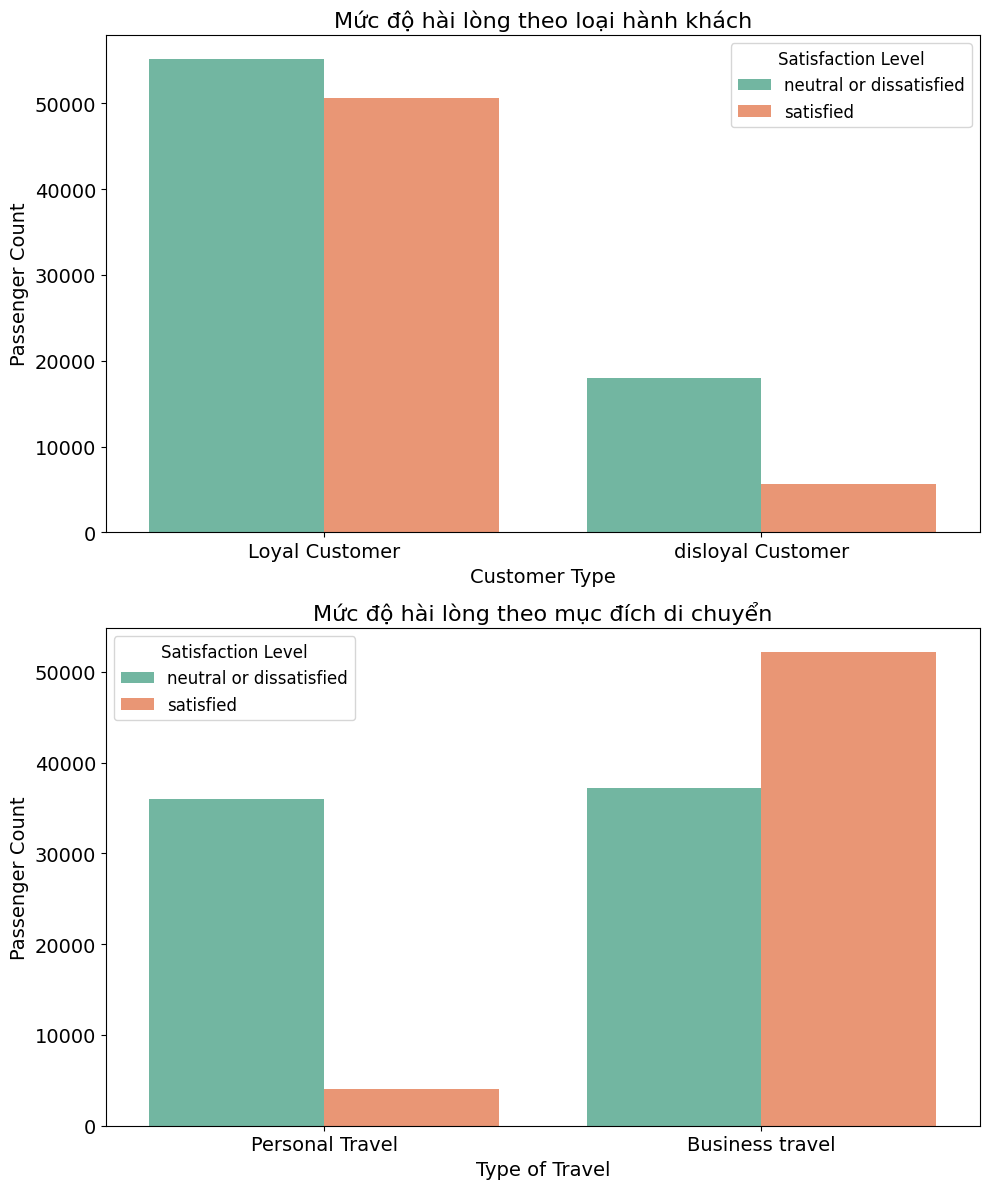

In [ ]:
plt.figure(figsize=(10,12))
# Chart 1: Satisfaction by Customer Type
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='Set2')
plt.title("Mức độ hài lòng theo loại hành khách", fontsize=16)
plt.xlabel("Customer Type", fontsize=14)
plt.ylabel("Passenger Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Satisfaction Level', fontsize=12, title_fontsize=12)

# Chart 2: Satisfaction by Type of Travel
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette='Set2')
plt.title("Mức độ hài lòng theo mục đích di chuyển", fontsize=16)
plt.xlabel("Type of Travel", fontsize=14)
plt.ylabel("Passenger Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Satisfaction Level', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()


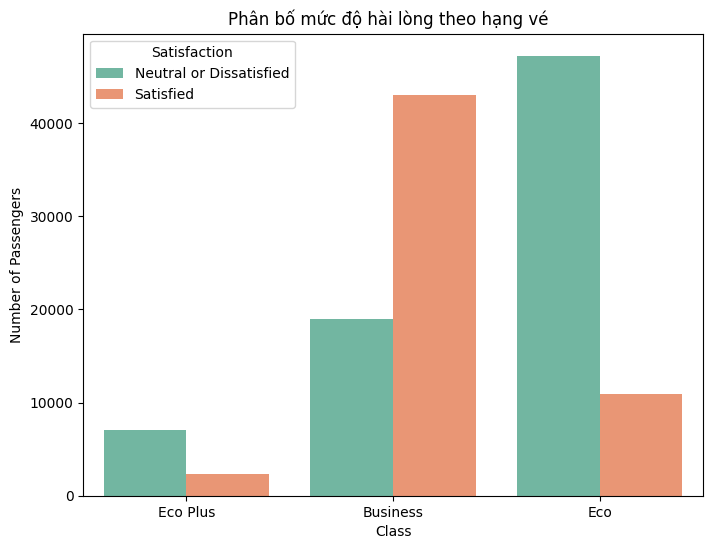

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã có dataframe tên là df
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='satisfaction', palette='Set2')

# Đổi tiêu đề và nhãn trục sang tiếng Anh
plt.title('Phân bố mức độ hài lòng theo hạng vé  ')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')

# Đổi chú thích sang tiếng Anh (nếu muốn rõ hơn có thể dùng manual legend)
plt.legend(title='Satisfaction', labels=['Neutral or Dissatisfied', 'Satisfied'])

plt.show()


##4.3. Phân tích thông tin chuyến bay

<ipython-input-20-017bae870177>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Flight Distance', data=df,palette='Set3',showfliers=False)


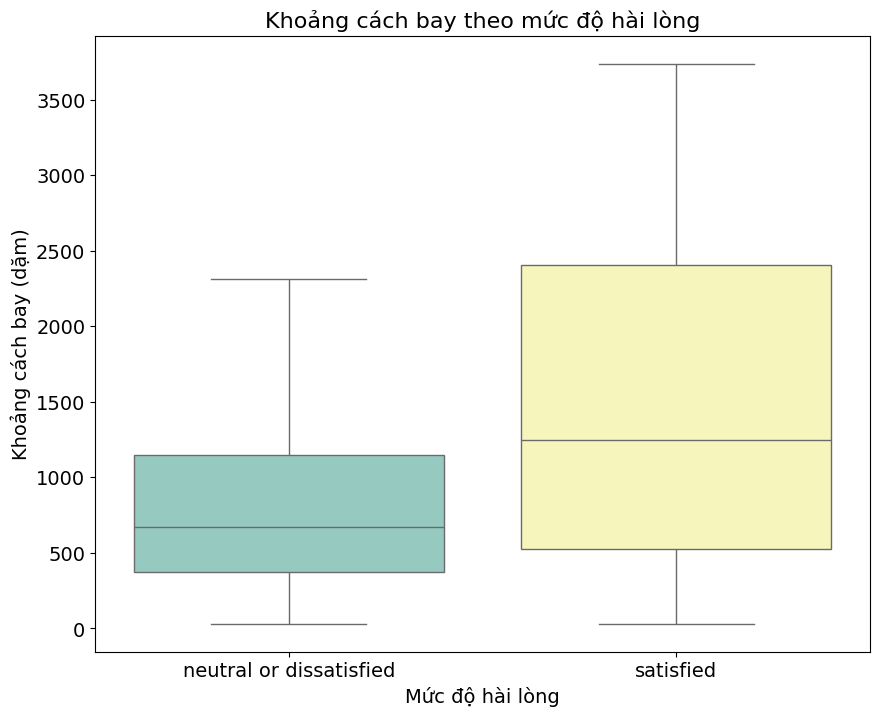

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước đồ thị
plt.figure(figsize=(10, 8))

#  Biểu đồ Flight Distance vs Satisfaction
sns.boxplot(x='satisfaction', y='Flight Distance', data=df,palette='Set3',showfliers=False)
plt.title('Khoảng cách bay theo mức độ hài lòng',fontsize=16)
plt.xlabel('Mức độ hài lòng',fontsize=14)
plt.ylabel('Khoảng cách bay (dặm)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


<ipython-input-21-8bf363e6d12f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df,palette='Set3',showfliers=False)
<ipython-input-21-8bf363e6d12f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df,palette='Set3',showfliers=False)


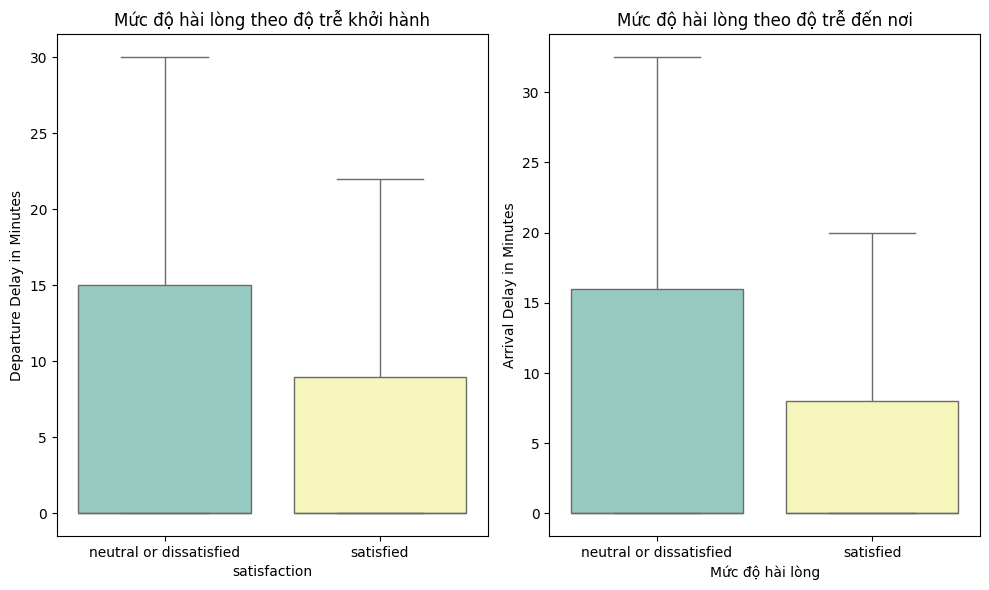

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index before plotting to avoid duplicate labels
df = df.reset_index(drop=True)

plt.figure(figsize=(10, 6))

# Boxplot cho độ trễ khởi hành
plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df,palette='Set3',showfliers=False)
plt.title('Mức độ hài lòng theo độ trễ khởi hành')

# Boxplot cho độ trễ đến nơi
plt.subplot(1, 2, 2)
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df,palette='Set3',showfliers=False)
plt.title('Mức độ hài lòng theo độ trễ đến nơi')

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Mức độ hài lòng')

plt.tight_layout()
plt.show()


##4.4. Phân tích đánh giá dịch vụ

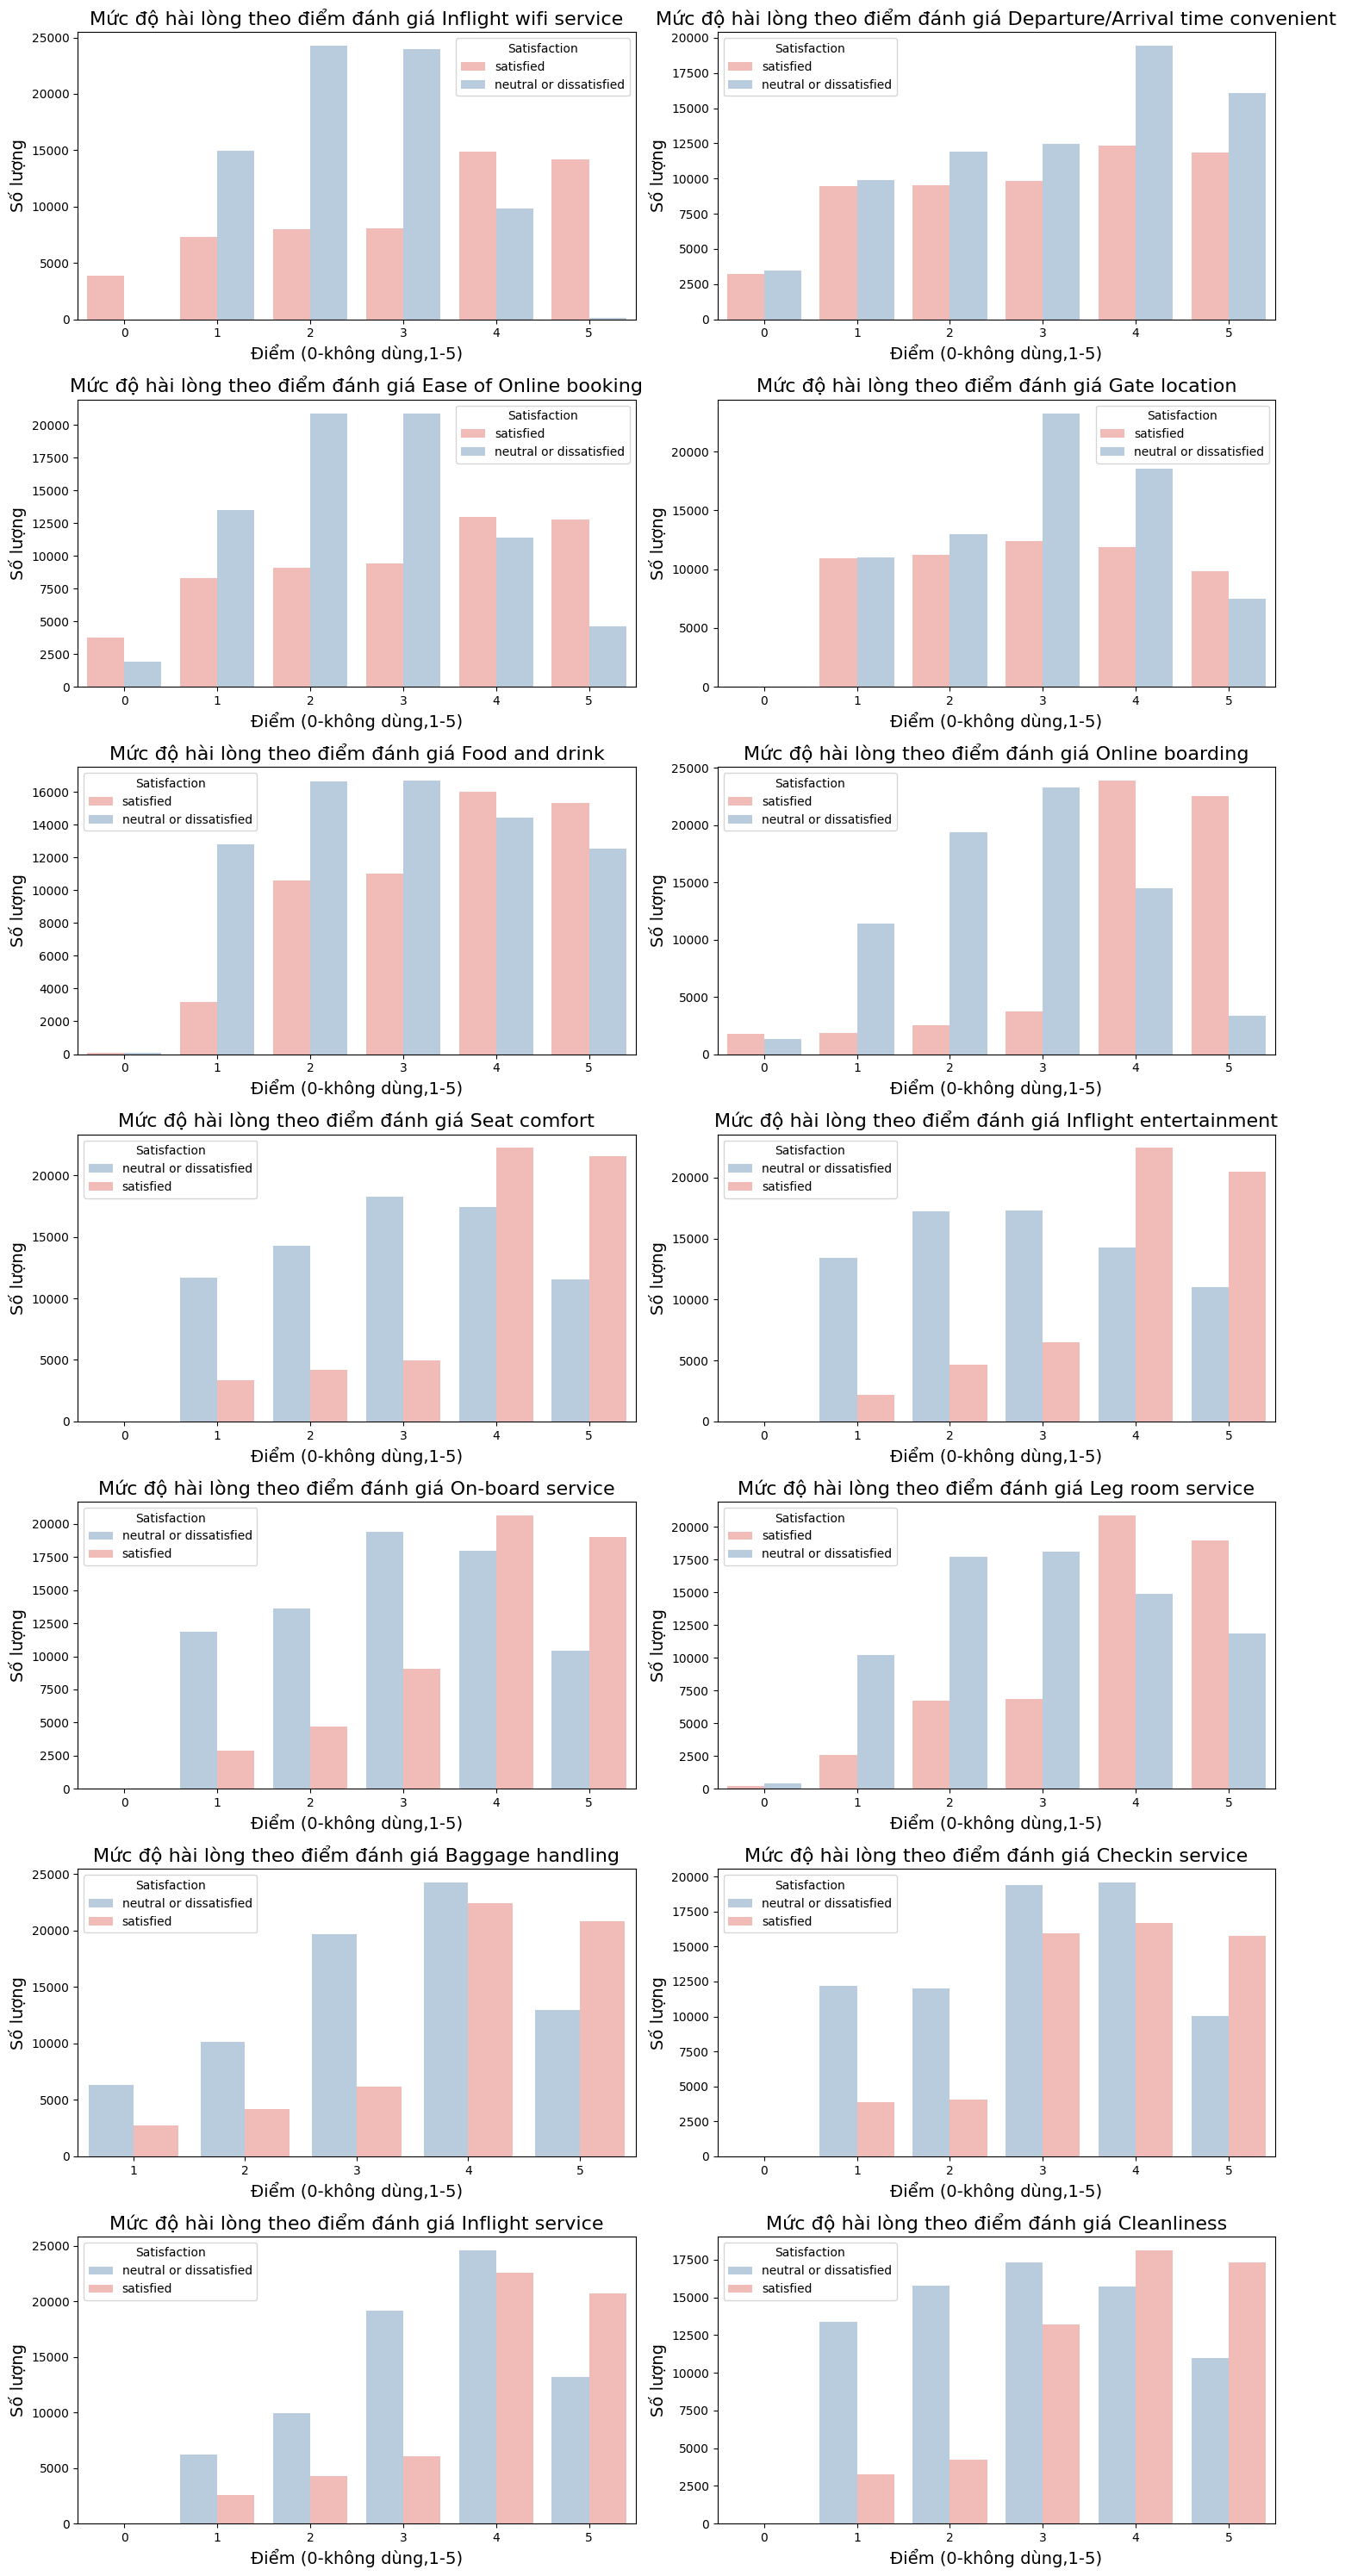

In [ ]:
# Định nghĩa màu cố định cho từng nhãn
satisfaction_colors = {
    'satisfied':'#fbb4ae' ,
    'neutral or dissatisfied': '#b3cde3'
}
service_columns = [
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
axes = axes.flatten()
for i, col in enumerate(service_columns):
  sns.countplot(data=df, x=col, hue='satisfaction', palette=satisfaction_colors, ax=axes[i])
  axes[i].set_title(f'Mức độ hài lòng theo điểm đánh giá {col}',fontsize=16)
  axes[i].set_xlabel('Điểm (0-không dùng,1-5)',fontsize=14)
  axes[i].set_ylabel('Số lượng',fontsize=14)
  axes[i].legend(title='Satisfaction')

for j in range(len(service_columns), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##4.5. Phân tích tương quan

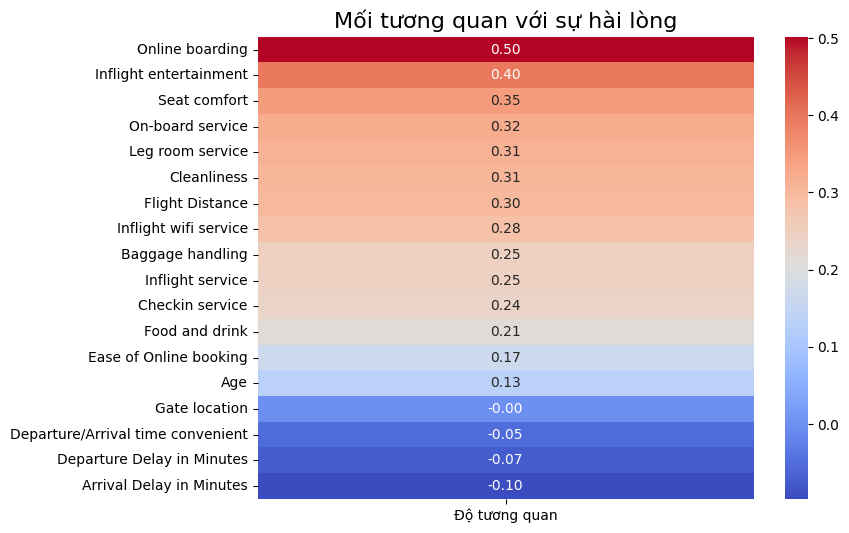

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo bản sao của df để xử lý tạm thời
temp_df = df.copy()

# Mã hóa tạm thời cột 'satisfaction' trong temp_df
le = LabelEncoder()
temp_df['satisfaction'] = le.fit_transform(temp_df['satisfaction'])

# Chọn các biến dạng số từ temp_df
num_df = temp_df.select_dtypes(include=['number']).copy()

# Tính hệ số tương quan giữa các biến và 'satisfaction'
correlation_with_satisfaction = num_df.corr()['satisfaction'].sort_values(ascending=False)

# Chuyển thành DataFrame, loại bỏ chính cột 'satisfaction'
correlation_df = correlation_with_satisfaction.drop('satisfaction').to_frame(name='Độ tương quan')

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mối tương quan với sự hài lòng', fontsize=16)
plt.show()


## 4.6 Một số phát hiện chính

In [ ]:
# In ra một số phát hiện từ EDA về sự hài lòng
print("===== PHÁT HIỆN TỪ EDA =====")
print(f"1. Tỷ lệ khách hàng hài lòng tổng thể: {temp_df['satisfaction'].mean()*100:.2f}%")

# Tỷ lệ hài lòng theo loại hạng ghế
class_satisfaction = temp_df.groupby('Class')['satisfaction'].mean() * 100
print(f"2. Tỷ lệ hài lòng theo hạng ghế:")
for class_type, rate in class_satisfaction.items():
    print(f"   - {class_type}: {rate:.2f}%")

# Tỷ lệ hài lòng mục đích di chuyển
travel_satisfaction = temp_df.groupby('Type of Travel')['satisfaction'].mean() * 100
print(f"3. Tỷ lệ hài lòng theo mục đích di chuyển:")
for ctype, rate in travel_satisfaction.items():
    print(f"   - {ctype}: {rate:.2f}%")

# Tỷ lệ hài lòng theo độ trễ chuyến bay
delayed_flights = temp_df[temp_df['Departure Delay in Minutes'] > 15]
print(f"4. Tỷ lệ hài lòng ở khách hàng bị trễ khởi hành (>15 phút): {delayed_flights['satisfaction'].mean()*100:.2f}%")
# Tỷ lệ hài lòng theo độ trễ chuyến bay

delayed_arrival = temp_df[temp_df['Arrival Delay in Minutes'] > 15]
print(f"5. Tỷ lệ hài lòng ở khách hàng bị trễ đến nơi (>15 phút): {delayed_arrival['satisfaction'].mean()*100:.2f}%")

# Theo khoảng cách bay
q1_distance = temp_df['Flight Distance'].quantile(0.25)
q3_distance = temp_df['Flight Distance'].quantile(0.75)

long_distance = temp_df[temp_df['Flight Distance'] > temp_df['Flight Distance'].quantile(0.75)]
short_distance = temp_df[temp_df['Flight Distance'] <= temp_df['Flight Distance'].quantile(0.25)]
print(f"6. Tỷ lệ hài lòng ở khách hàng bay khoảng cách")
print(f"   - Ở khách hàng bay đường dài từ trên {q3_distance:.0f} dặm: {long_distance['satisfaction'].mean()*100:.2f}%")
print(f"   - Ở khách hàng bay khoảng cách ngắn từ dưới {q1_distance:.0f} dặm: {short_distance['satisfaction'].mean()*100:.2f}%")

# Tỷ lệ hài lòng ở khách hàng thường xuyên
loyal_customers = temp_df[temp_df['Customer Type'] == 'Loyal Customer']
print(f"7. Tỷ lệ hài lòng ở khách hàng trung thành: {loyal_customers['satisfaction'].mean()*100:.2f}%")


===== PHÁT HIỆN TỪ EDA =====
1. Tỷ lệ khách hàng hài lòng tổng thể: 43.45%
2. Tỷ lệ hài lòng theo hạng ghế:
   - Business: 69.45%
   - Eco: 18.76%
   - Eco Plus: 24.63%
3. Tỷ lệ hài lòng theo mục đích di chuyển:
   - Business travel: 58.37%
   - Personal Travel: 10.13%
4. Tỷ lệ hài lòng ở khách hàng bị trễ khởi hành (>15 phút): 36.94%
5. Tỷ lệ hài lòng ở khách hàng bị trễ đến nơi (>15 phút): 35.79%
6. Tỷ lệ hài lòng ở khách hàng bay khoảng cách
   - Ở khách hàng bay đường dài từ trên 1744 dặm: 68.41%
   - Ở khách hàng bay khoảng cách ngắn từ dưới 414 dặm: 33.85%
7. Tỷ lệ hài lòng ở khách hàng trung thành: 47.81%


Tỷ lệ hài lòng tổng thể là 43.45%, một con số khá thấp, cho thấy có sự không hài lòng rõ rệt từ khách hàng. Điều này đòi hỏi cần có các biện pháp cải thiện chất lượng dịch vụ và trải nghiệm của khách hàng.

Hạng ghế có tác động lớn đến sự hài lòng. Khách hàng ở hạng Business có tỷ lệ hài lòng rất cao (69.45%), trong khi hạng Eco và Eco Plus có tỷ lệ hài lòng thấp hơn nhiều (18.76% và 24.63%). Điều này cho thấy sự phân hóa rõ rệt trong chất lượng dịch vụ theo hạng ghế.

Mục đích di chuyển cũng ảnh hưởng đến sự hài lòng. Khách hàng đi công tác (Business travel) hài lòng hơn (58.37%) so với khách hàng đi du lịch cá nhân (Personal travel, chỉ 10.13% hài lòng), có thể phản ánh sự khác biệt trong kỳ vọng và trải nghiệm của từng nhóm khách hàng.

Trễ khởi hành và đến nơi đều ảnh hưởng xấu đến sự hài lòng. Khách hàng bị trễ khởi hành (>15 phút) chỉ có tỷ lệ hài lòng là 36.94%, và khách hàng bị trễ đến nơi có tỷ lệ hài lòng là 35.79%. Việc giảm thiểu trễ chuyến có thể là yếu tố quan trọng để nâng cao sự hài lòng của khách hàng.

Khoảng cách bay cũng tác động đến sự hài lòng, với khách hàng bay đường dài (trên 1744 dặm) có tỷ lệ hài lòng cao hơn nhiều (68.41%) so với khách hàng bay đường ngắn (dưới 414 dặm) với tỷ lệ hài lòng chỉ 33.85%.

Khách hàng trung thành có tỷ lệ hài lòng khá cao (47.81%), cho thấy những khách hàng đã sử dụng dịch vụ lâu dài có xu hướng hài lòng hơn.

Kết hợp tất cả dữ liệu từ EDA, có thể xác định rõ phương án cải thiện sự hài lòng của khách hàng:
- Cung cấp dịch vụ tốt hơn cho khách hàng hạng Eco và Eco Plus, chẳng hạn như cải thiện sự thoải mái, cung cấp thêm dịch vụ giải trí hoặc các dịch vụ hỗ trợ khác.
- Xem xét cách cải thiện trải nghiệm cho khách hàng đi du lịch cá nhân, có thể thông qua việc cung cấp thêm các tiện ích hoặc chương trình khuyến mãi dành cho nhóm này.
- Giảm thiểu trễ chuyến, tối ưu hóa lịch trình và các yếu tố có thể gây trễ (như vấn đề kỹ thuật hoặc điều kiện thời tiết), qua đó cải thiện sự hài lòng của khách hàng.
- Cải thiện dịch vụ cho các chuyến bay ngắn, có thể thông qua việc nâng cao chất lượng dịch vụ trên chuyến bay (cung cấp thêm dịch vụ ăn uống, giải trí, hoặc chăm sóc khách hàng).
- Duy trì các chương trình khách hàng trung thành, tăng cường chăm sóc khách hàng và cải thiện trải nghiệm của khách hàng để duy trì sự trung thành và nâng cao sự hài lòng.

# 5.Xây dựng mô hình

## 5.1.Chuẩn bị dữ liệu

### Mã hóa các biến phân loại

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Xác định các cột phân loại
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Các cột phân loại cần mã hóa:", categorical_cols)
for col in categorical_cols:
    print(f"Biến phân loại: {col}")
    print("Giá trị:", df[col].unique())
    print("-" * 50)
# Phân loại: cột nhị phân → LabelEncoder, còn lại → OneHotEncoder
label_encoded_cols = [col for col in categorical_cols if df[col].nunique() <= 2]
onehot_encoded_cols = [col for col in categorical_cols if df[col].nunique() > 2]

# Dùng LabelEncoder
label_encoders = {}
for col in label_encoded_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Ghi nhận cột ban đầu
original_columns = df.columns.tolist()

# One-hot encoding
df = pd.get_dummies(df, columns=onehot_encoded_cols, drop_first=False)

# Ghi nhận cột sau khi one-hot
new_columns = df.columns.tolist()
new_onehot_columns = list(set(new_columns) - set(original_columns))

# In ánh xạ LabelEncoder
print("\nKết quả mã hóa bằng LabelEncoder:\n")
for col, le in label_encoders.items():
    classes = le.classes_
    print(f"{col}:")
    for i, cls in enumerate(classes):
        print(f"  {i} = {cls}")
    print()

# In ánh xạ OneHotEncoder
print("Kết quả mã hóa bằng OneHotEncoder:\n")
for col in onehot_encoded_cols:
    related_cols = [c for c in new_columns if c.startswith(col + "_")]
    print(f"{col} → tạo các cột:")
    for c in related_cols:
        print(f"  {c}")
    print()


Các cột phân loại cần mã hóa: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Biến phân loại: Gender
Giá trị: ['Male' 'Female']
--------------------------------------------------
Biến phân loại: Customer Type
Giá trị: ['Loyal Customer' 'disloyal Customer']
--------------------------------------------------
Biến phân loại: Type of Travel
Giá trị: ['Personal Travel' 'Business travel']
--------------------------------------------------
Biến phân loại: Class
Giá trị: ['Eco Plus' 'Business' 'Eco']
--------------------------------------------------
Biến phân loại: satisfaction
Giá trị: ['neutral or dissatisfied' 'satisfied']
--------------------------------------------------

Kết quả mã hóa bằng LabelEncoder:

Gender:
  0 = Female
  1 = Male

Customer Type:
  0 = Loyal Customer
  1 = disloyal Customer

Type of Travel:
  0 = Business travel
  1 = Personal Travel

satisfaction:
  0 = neutral or dissatisfied
  1 = satisfied

Kết quả mã hóa bằng OneHotEncoder:

Class → tạo


- Với các biến có 2 lựa chọn như trên, việc dùng LabelEncoder là hoàn toàn hợp lý và hiệu quả.

- Không cần dùng One-Hot Encoding vì sẽ tạo thêm chiều không cần thiết (tăng độ phức tạp mô hình).

Tuy nhiên, cần lưu ý:

- Với biến như Satisfaction, nên đảm bảo không có quan hệ thứ bậc sai lệch nếu mô hình dùng thuật toán nhạy cảm với thứ tự (ví dụ: Logistic Regression).

2. OneHotEncoder (get_dummies)

- Áp dụng cho biến Class:

Biến Class gồm nhiều hơn 2 nhóm: Business, Eco, Eco Plus.

- Kết quả tạo 3 cột mới:

Class_Business, Class_Eco, Class_Eco Plus

Mỗi bản ghi chỉ có 1 trong 3 cột nhận giá trị 1, còn lại là 0.

- Ưu điểm:

Tránh gán ý nghĩa thứ tự sai giữa các nhóm không có thứ bậc.

Phù hợp cho các thuật toán không xử lý tốt biến phân loại dạng số nguyên (như Linear/Logistic Regression).

- Nhận xét:

Việc dùng OneHotEncoding cho biến Class là hoàn toàn chính xác.

Tuy nhiên, có thể loại bỏ 1 cột (drop_first=True) để tránh đa cộng tuyến nếu dùng hồi quy tuyến tính hoặc các thuật toán tương tự.

### Chia dữ liệu train/test

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Chia dữ liệu: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Kết quả
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (103589, 24)
Kích thước tập kiểm tra: (25898, 24)


### Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 4. Chuẩn hóa bằng MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi mảng numpy trở lại DataFrame để dễ hiển thị
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 5. In kích thước và 5 dòng đầu của tập huấn luyện sau khi chuẩn hóa
print("\nDữ liệu sau chuẩn hóa (5 dòng đầu):")
X_train_scaled_df.head().T



Dữ liệu sau chuẩn hóa (5 dòng đầu):


,0,1,2,3,4
Gender,1.000000,1.000000,0.000000,1.000000,0.000000
Customer Type,1.000000,0.000000,0.000000,1.000000,0.000000
Age,0.205128,0.384615,0.435897,0.166667,0.435897
Type of Travel,0.000000,0.000000,0.000000,0.000000,0.000000
Flight Distance,0.213323,0.599245,0.044498,0.258630,0.233010
Inflight wifi service,0.400000,0.600000,0.800000,0.400000,0.600000
Departure/Arrival time convenient,0.600000,0.600000,0.800000,0.400000,1.000000
Ease of Online booking,0.600000,0.600000,0.800000,0.400000,0.600000
Gate location,1.000000,0.600000,0.800000,0.600000,0.600000
Food and drink,0.400000,0.600000,1.000000,0.200000,0.600000


1. Dữ liệu đã chuẩn hóa thành công

Tất cả các cột đều có giá trị nằm trong khoảng từ 0 đến 1, cho thấy đã áp dụng đúng kỹ thuật chuẩn hóa, có thể là Min-Max Scaling.

Việc chuẩn hóa giúp đảm bảo các đặc trưng có cùng thang đo, tránh hiện tượng đặc trưng lớn chi phối mô hình.

2. Các biến định lượng đã sẵn sàng

Các cột như Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes đã được đưa về dạng số chuẩn.

Nhờ vậy, các mô hình như Logistic Regression, SVM hoặc mạng nơ-ron có thể học hiệu quả hơn.

3. Các biến phân loại đã được mã hóa hợp lý

Các biến nhị phân như Gender, Customer Type, Type of Travel, Satisfaction đã được mã hóa bằng LabelEncoder:

Ví dụ: 0 = Female, 1 = Male.

Cách làm này đơn giản, hiệu quả và hoàn toàn phù hợp với biến chỉ có 2 giá trị.

4. Biến đa nhóm đã được xử lý đúng cách

Biến Class (có nhiều hơn 2 giá trị) đã được mã hóa bằng One-Hot Encoding (get_dummies).

Tạo ra 3 cột: Class_Business, Class_Eco, Class_Eco Plus, trong đó mỗi bản ghi chỉ có 1 cột mang giá trị 1.

Cách này giúp tránh hiểu sai thứ tự giữa các nhóm, rất cần thiết khi không có mối quan hệ thứ bậc.

5. Không còn giá trị thiếu hoặc sai định dạng

Dữ liệu không chứa giá trị rỗng (NaN) hay dữ liệu dạng chuỗi (string).

Tất cả các cột đều ở dạng số, đảm bảo đồng nhất về kiểu dữ liệu, phù hợp cho mô hình học máy.

6. Gợi ý cải thiện

Cột Unnamed: 0 và id có vẻ chỉ là chỉ mục hoặc định danh → nên loại bỏ để tránh làm nhiễu mô hình vì không mang giá trị dự báo.

7. Kết luận
Dữ liệu sau chuẩn hóa đã được xử lý đầy đủ, khoa học và nhất quán.

Sẵn sàng cho các bước tiếp theo như huấn luyện mô hình, đánh giá và dự báo.

Đây là một tiền đề quan trọng để đảm bảo hiệu suất và độ chính xác của toàn bộ quy trình phân tích.

### Trích chọn đặc trưng quan trọng

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# ===== TRÍCH CHỌN ĐẶC TRƯNG VỚI DỮ LIỆU CHƯA CHUẨN HÓA =====
selector_unscaled = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)
selector_unscaled.fit(X_train, y_train)
X_train_unscaled_selected = selector_unscaled.transform(X_train)
X_test_unscaled_selected = selector_unscaled.transform(X_test)

Số đặc trưng được chọn: 12
                   Feature  Importance
10         Online boarding    0.178346
5    Inflight wifi service    0.145403
21          Class_Business    0.088431
3           Type of Travel    0.085591
12  Inflight entertainment    0.051828
11            Seat comfort    0.043489
7   Ease of Online booking    0.035343
14        Leg room service    0.035240
22               Class_Eco    0.034433
2                      Age    0.033471
4          Flight Distance    0.032135
1            Customer Type    0.031884


<ipython-input-40-6230f568d65e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importance_scaled, palette='Greens_d')


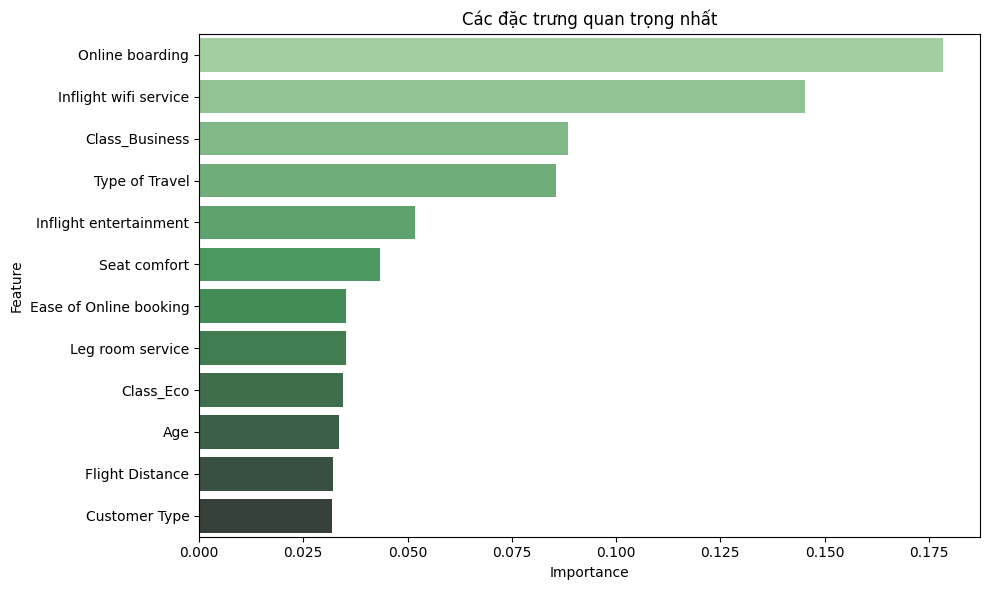

In [ ]:
# ===== TRÍCH CHỌN ĐẶC TRƯNG VỚI DỮ LIỆU ĐÃ CHUẨN HÓA =====
selector_scaled = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)
selector_scaled.fit(X_train_scaled, y_train)
X_train_scaled_selected = selector_scaled.transform(X_train_scaled)
X_test_scaled_selected = selector_scaled.transform(X_test_scaled)

# Lấy danh sách đặc trưng được chọn
selected_features_scaled = X_train.columns[selector_scaled.get_support()].tolist()
print(f"Số đặc trưng được chọn: {len(selected_features_scaled)}")

# Độ quan trọng đặc trưng đã chuẩn hóa
importances_scaled = selector_scaled.estimator_.feature_importances_
df_importance_scaled = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_scaled
}).sort_values(by='Importance', ascending=False).head(12)
print(df_importance_scaled)
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance_scaled, palette='Greens_d')
plt.title('Các đặc trưng quan trọng nhất')
plt.tight_layout()
plt.show()

## 5.2 Huấn luyện mô mình

## Huấn luyện mô hình

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Định nghĩa mô hình ban đầu
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'KNN': KNeighborsClassifier()
}

# Tập hợp tham số để tuning
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },

    'Random Forest': {
        'n_estimators': [100, 150],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },

    'Logistic Regression': {
        'penalty': ['l2'],
        'C': [0.1, 1.0, 10],
        'solver': ['lbfgs']
    },

    'Naive Bayes': {},  # Không cần tuning

    'XGBoost': {
        'n_estimators': [100, 150],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },

    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}
def tune_model(name, model, params, X_train, y_train):
    if not params:
        print(f"🔹 {name}: Không có tham số cần tuning.")
        model.fit(X_train, y_train)
        return model

    print(f"\n🔍 Đang tuning {name}...")
    if name in ['Random Forest', 'XGBoost']:
        search = RandomizedSearchCV(model, param_distributions=params, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
    else:
        search = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    search.fit(X_train, y_train)
    print(f"✅ Best params for {name}: {search.best_params_}")
    print(f"✅ Best CV Accuracy: {search.best_score_:.4f}")
    return search.best_estimator_
best_models = {}

for name in models:
    model = models[name]
    params = param_grids[name]
    best_models[name] = tune_model(name, model, params, X_train, y_train)



🔍 Đang tuning Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best params for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
✅ Best CV Accuracy: 0.9524

🔍 Đang tuning Random Forest...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
✅ Best params for Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'bootstrap': False}
✅ Best CV Accuracy: 0.9588

🔍 Đang tuning Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Best params for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
✅ Best CV Accuracy: 0.8700
🔹 Naive Bayes: Không có tham số cần tuning.

🔍 Đang tuning XGBoost...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:43:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best params for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
✅ Best CV Accuracy: 0.9630

🔍 Đang tuning KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
✅ Best CV Accuracy: 0.8325


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, roc_auc_score)
import xgboost as xgb
from lightgbm import LGBMClassifier

# ====================== HÀM ĐÁNH GIÁ MÔ HÌNH ======================
def evaluate_model(model, X_test, y_test, model_name, cmap_color='Blues'):

    start_time = time.time()
    y_pred = model.predict(X_test)

    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = model.decision_function(X_test) if hasattr(model, 'decision_function') else y_pred

    end_time = time.time()
    prediction_time = end_time - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n===== KẾT QUẢ MÔ HÌNH {model_name.upper()} =====")
    print(f"Độ chính xác (Accuracy): {accuracy:.4f}")
    print(f"Độ chuẩn xác (Precision): {precision:.4f}")
    print(f"Độ nhạy (Recall): {recall:.4f}")
    print(f"Điểm F1 (F1-Score): {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print(f"Testing time: {prediction_time:.4f} giây")

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc,
        'time': prediction_time,
        'conf_matrix':conf_matrix,
        'y_test': y_test,
        'y_prob': y_prob}

# ====================== ĐỊNH NGHĨA DANH SÁCH KẾT QUẢ ======================
results = []


In [ ]:
# ====================== HUẤN LUYỆN TẤT CẢ CÁC TRƯỜNG HỢP MỘT MÔ HÌNH ======================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(
        criterion='entropy',
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ),

    'Random Forest': RandomForestClassifier(
        n_estimators=150,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=1,
        bootstrap=False,
        random_state=42
    ),

    'Logistic Regression': LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        C=0.1,
        max_iter=1000,
        random_state=42
    ),

    'Naive Bayes': GaussianNB(),  # Không cần chỉnh

    'XGBoost': XGBClassifier(
        eval_metric='logloss',
        n_estimators=100,
        learning_rate=0.2,
        max_depth=7,
        subsample=1.0,
        colsample_bytree=1.0,
        random_state=42
    ),

    'KNN': KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        metric='manhattan'
    )
}

# Khởi tạo danh sách để lưu kết quả
results = []

# Huấn luyện và đánh giá cho từng mô hình
for name, model in models.items():

    # ====================== TRƯỜNG HỢP 1: CHƯA CHUẨN HÓA + CHƯA TRÍCH CHỌN ======================
    print("\n========================================================")
    print(f"TRƯỜNG HỢP 1: {name} - CHƯA CHUẨN HÓA + CHƯA TRÍCH CHỌN ĐẶC TRƯNG")
    print("========================================================")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {train_time:.4f} giây")

    result = evaluate_model(model, X_test, y_test, f"{name} (Chưa chuẩn hóa, chưa trích chọn)", cmap_color='Blues')
    result['train_time'] = train_time
    results.append(result)

    # ====================== TRƯỜNG HỢP 2: ĐÃ CHUẨN HÓA + CHƯA TRÍCH CHỌN ======================
    print("\n========================================================")
    print(f"TRƯỜNG HỢP 2: {name} - ĐÃ CHUẨN HÓA + CHƯA TRÍCH CHỌN ĐẶC TRƯNG")
    print("========================================================")
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {train_time:.4f} giây")

    result = evaluate_model(model, X_test_scaled, y_test, f"{name} (Đã chuẩn hóa, chưa trích chọn)", cmap_color='Purples')
    result['train_time'] = train_time
    results.append(result)

    # ====================== TRƯỜNG HỢP 3: CHƯA CHUẨN HÓA + ĐÃ TRÍCH CHỌN ======================
    print("\n========================================================")
    print(f"TRƯỜNG HỢP 3: {name} - CHƯA CHUẨN HÓA + ĐÃ TRÍCH CHỌN ĐẶC TRƯNG")
    print("========================================================")
    start_time = time.time()
    model.fit(X_train_unscaled_selected, y_train)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {train_time:.4f} giây")

    result = evaluate_model(model, X_test_unscaled_selected, y_test, f"{name} (Chưa chuẩn hóa, đã trích chọn)", cmap_color='Oranges')
    result['train_time'] = train_time
    results.append(result)

    # ====================== TRƯỜNG HỢP 4: ĐÃ CHUẨN HÓA + ĐÃ TRÍCH CHỌN ======================
    print("\n========================================================")
    print(f"TRƯỜNG HỢP 4: {name} - ĐÃ CHUẨN HÓA + ĐÃ TRÍCH CHỌN ĐẶC TRƯNG")
    print("========================================================")
    start_time = time.time()
    model.fit(X_train_scaled_selected, y_train)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {train_time:.4f} giây")

    result = evaluate_model(model, X_test_scaled_selected, y_test, f"{name} (Đã chuẩn hóa, đã trích chọn)", cmap_color='Greens')
    result['train_time'] = train_time
    results.append(result)



TRƯỜNG HỢP 1: Decision Tree - CHƯA CHUẨN HÓA + CHƯA TRÍCH CHỌN ĐẶC TRƯNG
Thời gian huấn luyện: 0.7529 giây

===== KẾT QUẢ MÔ HÌNH DECISION TREE (CHƯA CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.9530
Độ chuẩn xác (Precision): 0.9575
Độ nhạy (Recall): 0.9333
Điểm F1 (F1-Score): 0.9452
AUC: 0.9811
Testing time: 0.0124 giây

TRƯỜNG HỢP 2: Decision Tree - ĐÃ CHUẨN HÓA + CHƯA TRÍCH CHỌN ĐẶC TRƯNG
Thời gian huấn luyện: 0.6161 giây

===== KẾT QUẢ MÔ HÌNH DECISION TREE (ĐÃ CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.9530
Độ chuẩn xác (Precision): 0.9575
Độ nhạy (Recall): 0.9333
Điểm F1 (F1-Score): 0.9452
AUC: 0.9811
Testing time: 0.0112 giây

TRƯỜNG HỢP 3: Decision Tree - CHƯA CHUẨN HÓA + ĐÃ TRÍCH CHỌN ĐẶC TRƯNG
Thời gian huấn luyện: 0.3349 giây

===== KẾT QUẢ MÔ HÌNH DECISION TREE (CHƯA CHUẨN HÓA, ĐÃ TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.9464
Độ chuẩn xác (Precision): 0.9495
Độ nhạy (Recall): 0.9260
Điểm F1 (F1-Score): 0.9376
AUC: 0.9806
Testing time: 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thời gian huấn luyện: 36.9541 giây

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (CHƯA CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8700
Độ chuẩn xác (Precision): 0.8579
Độ nhạy (Recall): 0.8398
Điểm F1 (F1-Score): 0.8488
AUC: 0.9254
Testing time: 0.0401 giây

TRƯỜNG HỢP 2: Logistic Regression - ĐÃ CHUẨN HÓA + CHƯA TRÍCH CHỌN ĐẶC TRƯNG
Thời gian huấn luyện: 2.9024 giây

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (ĐÃ CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8747
Độ chuẩn xác (Precision): 0.8694
Độ nhạy (Recall): 0.8376
Điểm F1 (F1-Score): 0.8532
AUC: 0.9281
Testing time: 0.0450 giây

TRƯỜNG HỢP 3: Logistic Regression - CHƯA CHUẨN HÓA + ĐÃ TRÍCH CHỌN ĐẶC TRƯNG


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thời gian huấn luyện: 34.8820 giây

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (CHƯA CHUẨN HÓA, ĐÃ TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8620
Độ chuẩn xác (Precision): 0.8497
Độ nhạy (Recall): 0.8291
Điểm F1 (F1-Score): 0.8393
AUC: 0.9186
Testing time: 0.0029 giây

TRƯỜNG HỢP 4: Logistic Regression - ĐÃ CHUẨN HÓA + ĐÃ TRÍCH CHỌN ĐẶC TRƯNG
Thời gian huấn luyện: 0.9784 giây

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (ĐÃ CHUẨN HÓA, ĐÃ TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8622
Độ chuẩn xác (Precision): 0.8498
Độ nhạy (Recall): 0.8293
Điểm F1 (F1-Score): 0.8394
AUC: 0.9185
Testing time: 0.0028 giây

TRƯỜNG HỢP 1: Naive Bayes - CHƯA CHUẨN HÓA + CHƯA TRÍCH CHỌN ĐẶC TRƯNG
Thời gian huấn luyện: 0.0728 giây

===== KẾT QUẢ MÔ HÌNH NAIVE BAYES (CHƯA CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8514
Độ chuẩn xác (Precision): 0.8408
Độ nhạy (Recall): 0.8116
Điểm F1 (F1-Score): 0.8260
AUC: 0.9197
Testing time: 0.0292 giây

TRƯỜNG HỢP 2: Naive Bayes - ĐÃ CHUẨN HÓA + CHƯA 

In [ ]:
# ====================== SO SÁNH KẾT QUẢ ======================
# Tạo bảng so sánh
results_df = pd.DataFrame(results)
results_df= results_df[['model', 'accuracy', 'precision', 'recall', 'f1', 'auc']]
print("======================BẢNG SO SÁNH KẾT QUẢ CÁC MÔ HÌNH============================")
results_df

======================BẢNG SO SÁNH KẾT QUẢ CÁC MÔ HÌNH============================


,model,accuracy,precision,recall,f1,auc
0,"Decision Tree (Chưa chuẩn hóa, chưa trích chọn)",0.953008,0.957513,0.933262,0.945232,0.981107
1,"Decision Tree (Đã chuẩn hóa, chưa trích chọn)",0.953008,0.957513,0.933262,0.945232,0.981105
2,"Decision Tree (Chưa chuẩn hóa, đã trích chọn)",0.946444,0.949517,0.925975,0.937598,0.980592
3,"Decision Tree (Đã chuẩn hóa, đã trích chọn)",0.946367,0.949508,0.925798,0.937503,0.980484
4,"Random Forest (Chưa chuẩn hóa, chưa trích chọn)",0.960576,0.966108,0.942326,0.954069,0.993623
5,"Random Forest (Đã chuẩn hóa, chưa trích chọn)",0.960499,0.965847,0.942415,0.953987,0.993621
6,"Random Forest (Chưa chuẩn hóa, đã trích chọn)",0.949147,0.955028,0.926597,0.940598,0.990621
7,"Random Forest (Đã chuẩn hóa, đã trích chọn)",0.949147,0.955028,0.926597,0.940598,0.990624
8,"Logistic Regression (Chưa chuẩn hóa, chưa tríc...",0.869951,0.857921,0.839776,0.848752,0.925443
9,"Logistic Regression (Đã chuẩn hóa, chưa trích ...",0.874739,0.869385,0.837554,0.853173,0.928078


## ma trận nhầm lẫn

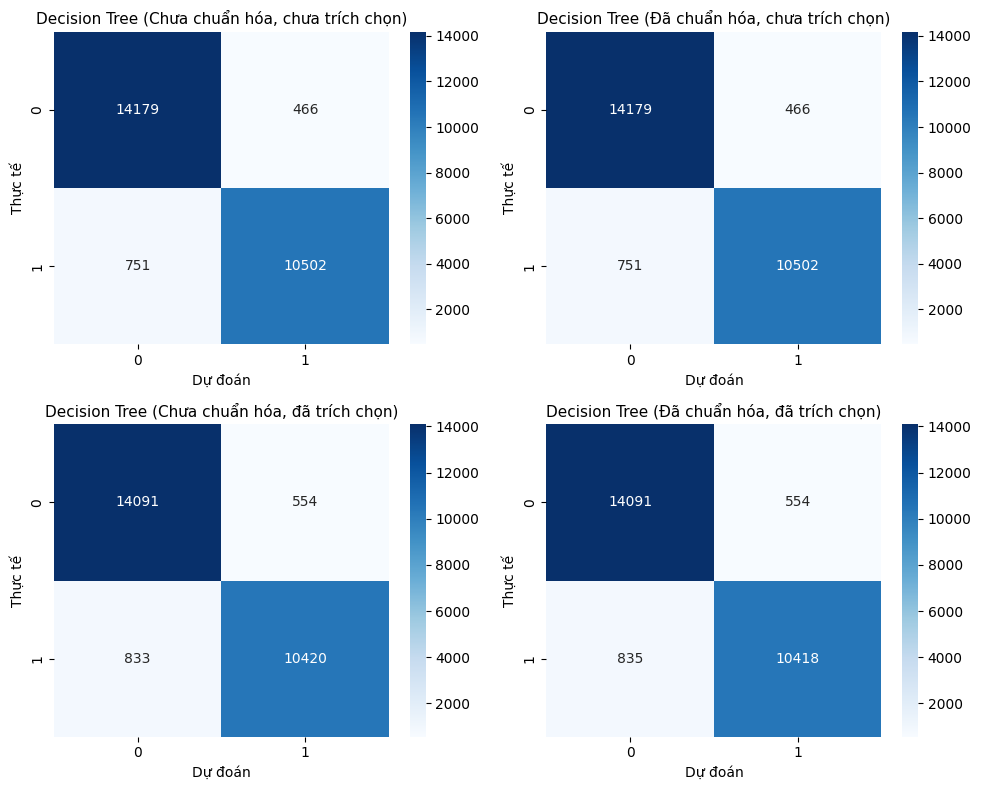

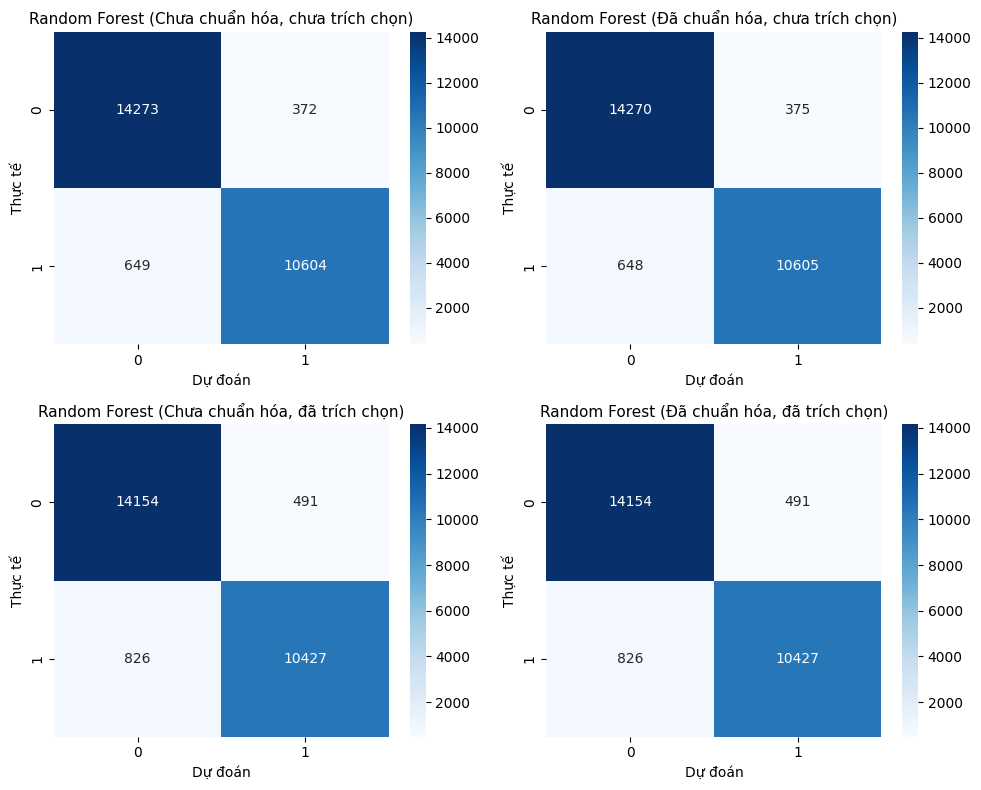

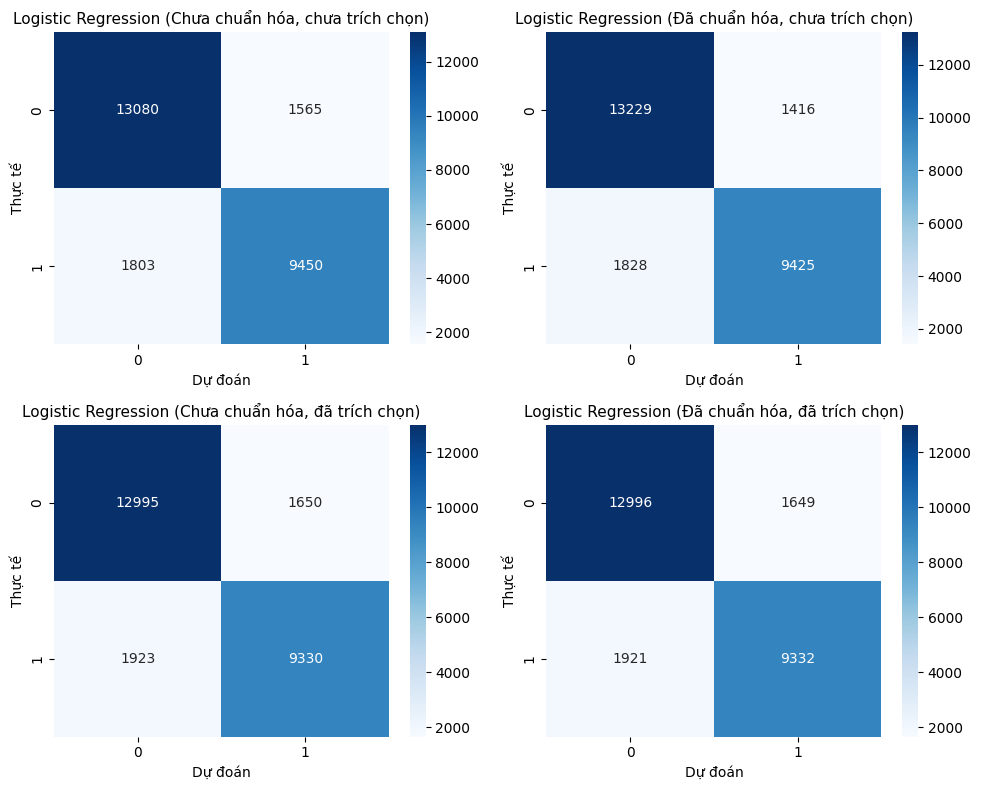

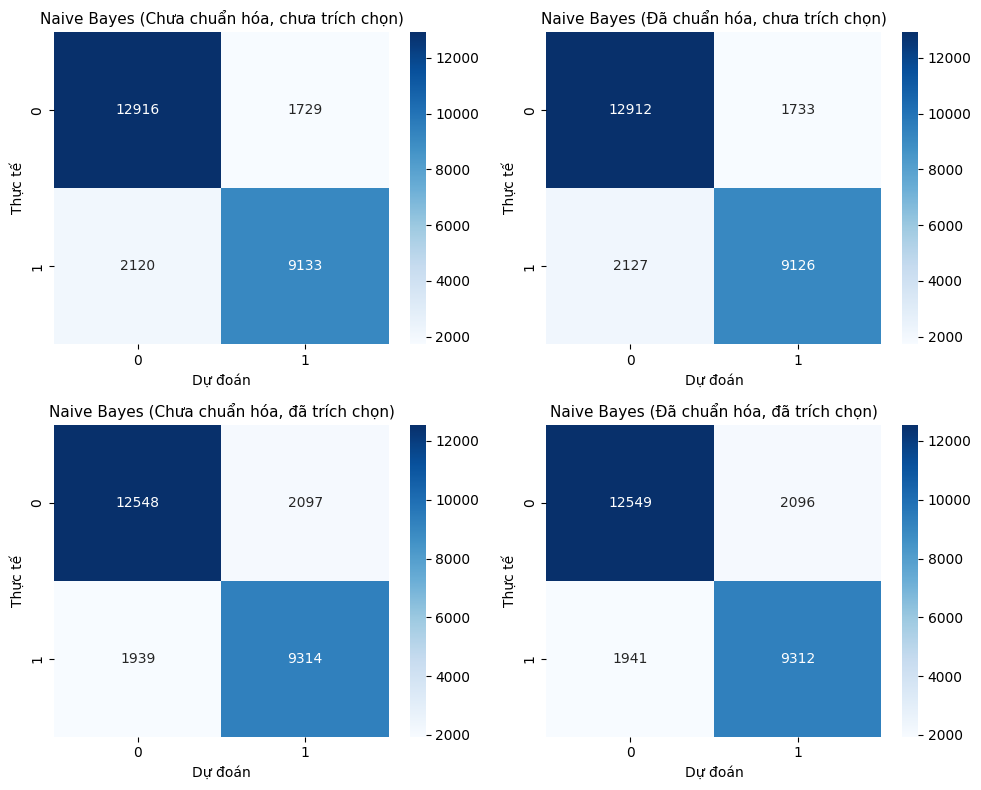

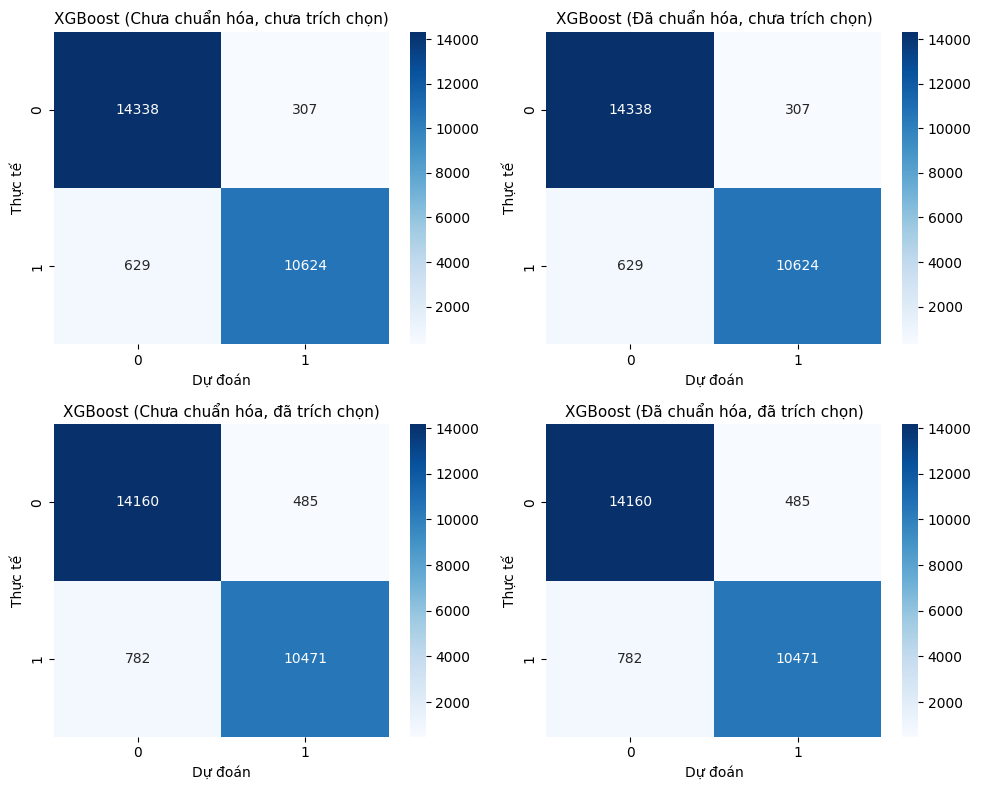

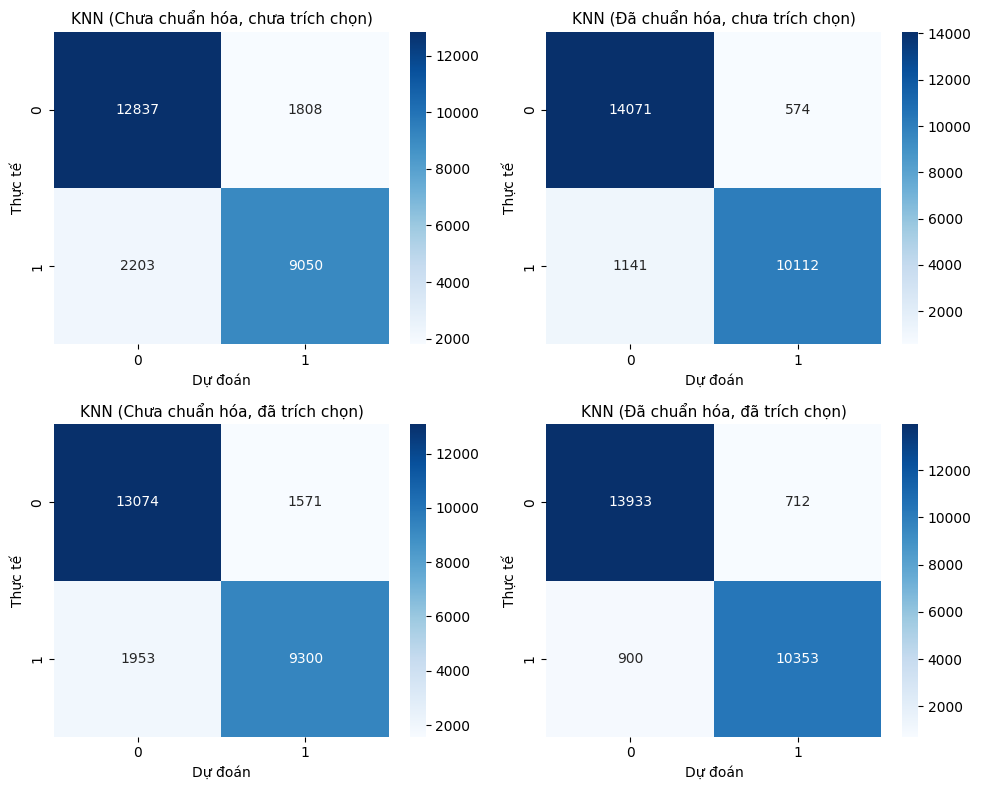

In [ ]:
def plot_confusion_matrices(results, n_rows=2, n_cols=2):

    # Define color maps for different model cases
    cmaps = ['Blues']

    # Get total number of models to plot
    num_models = len(results)

    # Calculate how many figures we need
    n_figures = (num_models + (n_rows * n_cols - 1)) // (n_rows * n_cols)

    for fig_idx in range(n_figures):
        # Create a new figure for each set of 4 matrices
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
        axes = axes.flatten()

        # Determine which models to plot in this figure
        start_idx = fig_idx * n_rows * n_cols
        end_idx = min(start_idx + n_rows * n_cols, num_models)

        for i, idx in enumerate(range(start_idx, end_idx)):
            # Get the confusion matrix and model name
            conf_matrix = results[idx]['conf_matrix']
            model_name = results[idx]['model']

            # Choose color map (cycling through the list)
            cmap_color = cmaps[idx % len(cmaps)]

            # Plot the confusion matrix
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_color, ax=axes[i])
            axes[i].set_title(f"{model_name}", fontsize=11)
            axes[i].set_xlabel("Dự đoán", fontsize=10)
            axes[i].set_ylabel("Thực tế", fontsize=10)

        # Turn off any unused subplots
        for j in range(end_idx - start_idx, n_rows * n_cols):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

# Call the function to plot confusion matrices
plot_confusion_matrices(results)

## ROC

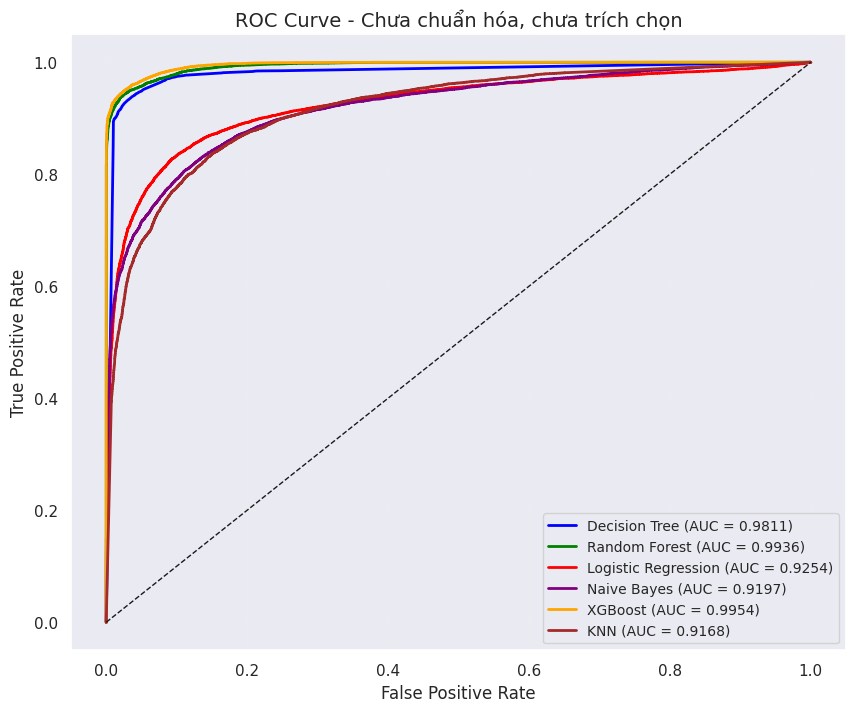

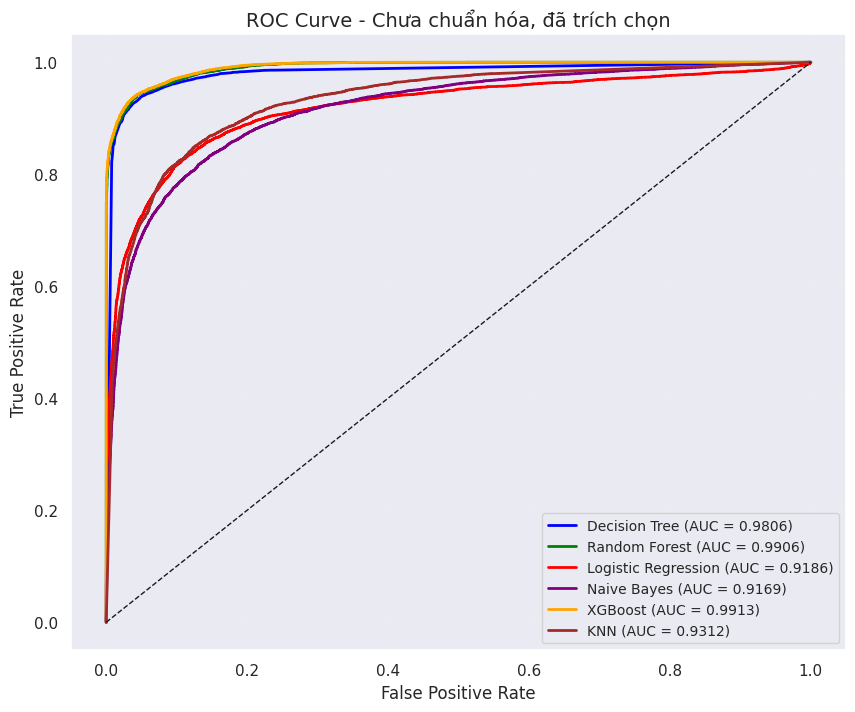

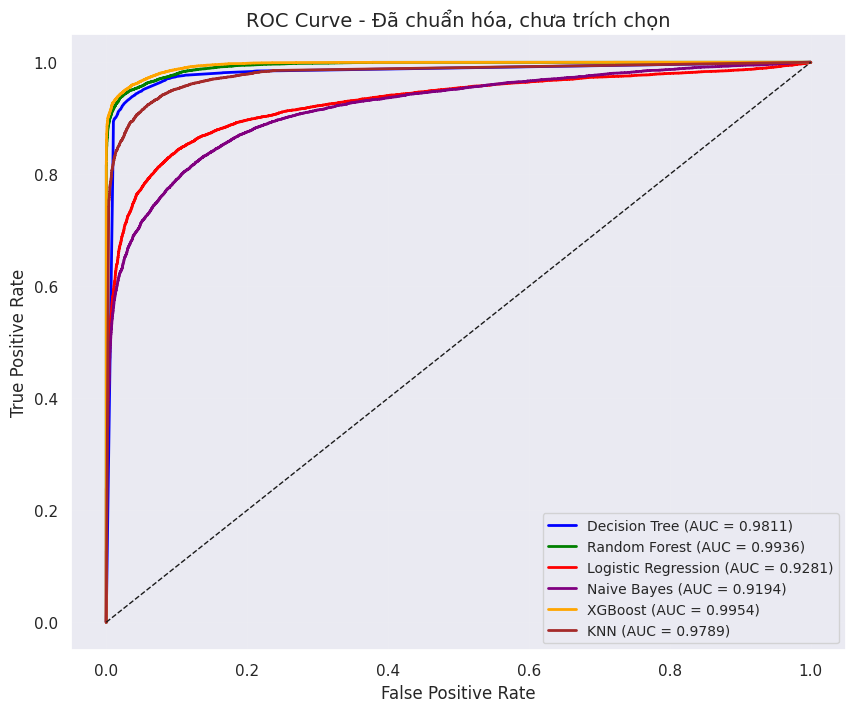

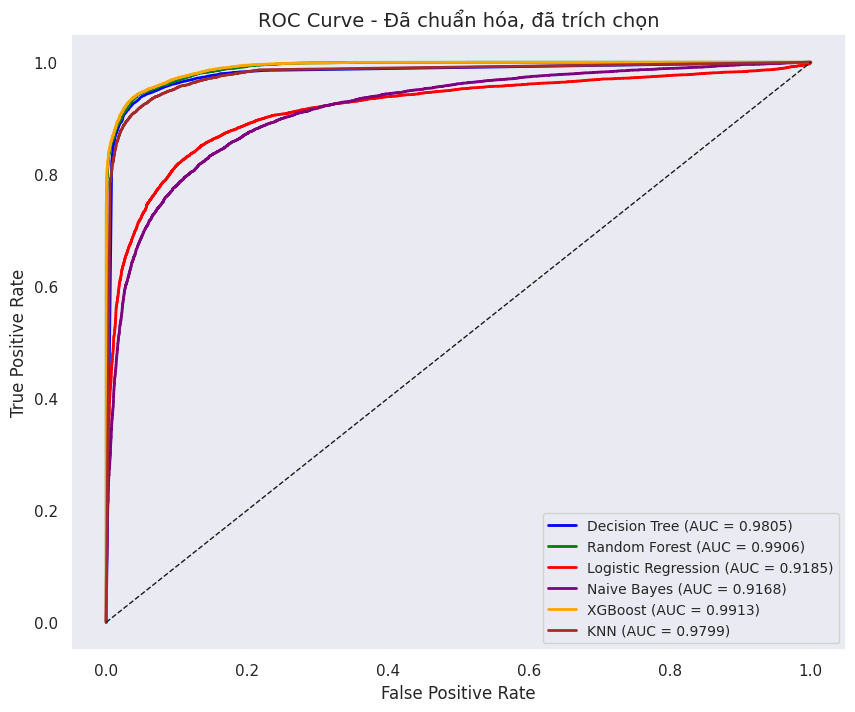

In [ ]:
def plot_roc_curves_by_preprocessing(results):
    # Define colors for each model to keep consistent across plots
    colors = {
        'Decision Tree': 'blue',
        'Random Forest': 'green',
        'Logistic Regression': 'red',
        'Naive Bayes': 'purple',
        'XGBoost': 'orange',
        'KNN': 'brown'
    }

    # Extract preprocessing cases
    preprocessing_cases = sorted(set([r['model'].split(' (')[1].split(')')[0] for r in results]))

    # Create one figure for each preprocessing case
    for case in preprocessing_cases:
        plt.figure(figsize=(10, 8))

        # Get results for this preprocessing case
        case_results = [r for r in results if case in r['model']]

        # Plot ROC curve for each model using this preprocessing
        for result in case_results:
            # Extract model name
            model_name = result['model'].split(' (')[0]

            # Calculate ROC curve points
            fpr, tpr, _ = roc_curve(result['y_test'], result['y_prob'])

            # Plot with consistent color per model
            plt.plot(
                fpr, tpr,
                color=colors[model_name],
                lw=2,
                label=f'{model_name} (AUC = {result["auc"]:.4f})'
            )

        # Plot the diagonal reference line
        plt.plot([0, 1], [0, 1], 'k--', lw=1)

        # Format the plot
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {case}', fontsize=14)
        plt.legend(loc="lower right", fontsize=10)
        plt.grid(True, alpha=0.05)

        plt.show()

# Example of how to use the function:
plot_roc_curves_by_preprocessing(results)

## các trường hợp tốt nhất

BẢNG TÓM TẮT PHIÊN BẢN TỐT NHẤT CỦA MỖI MÔ HÌNH:
                                            Mô hình  Accuracy  Precision   Recall  F1-Score      AUC
          XGBoost (Chưa chuẩn hóa, chưa trích chọn)  0.963858   0.971915 0.944104  0.957807 0.995364
    Random Forest (Chưa chuẩn hóa, chưa trích chọn)  0.960576   0.966108 0.942326  0.954069 0.993623
    Decision Tree (Chưa chuẩn hóa, chưa trích chọn)  0.953008   0.957513 0.933262  0.945232 0.981107
                  KNN (Đã chuẩn hóa, đã trích chọn)  0.937756   0.935653 0.920021  0.927771 0.979933
Logistic Regression (Đã chuẩn hóa, chưa trích chọn)  0.874739   0.869385 0.837554  0.853173 0.928078
      Naive Bayes (Chưa chuẩn hóa, chưa trích chọn)  0.851378   0.840821 0.811606  0.825955 0.919664


<ipython-input-55-366141cb4746>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='display_name', x=metric, data=data_sorted, palette='viridis')


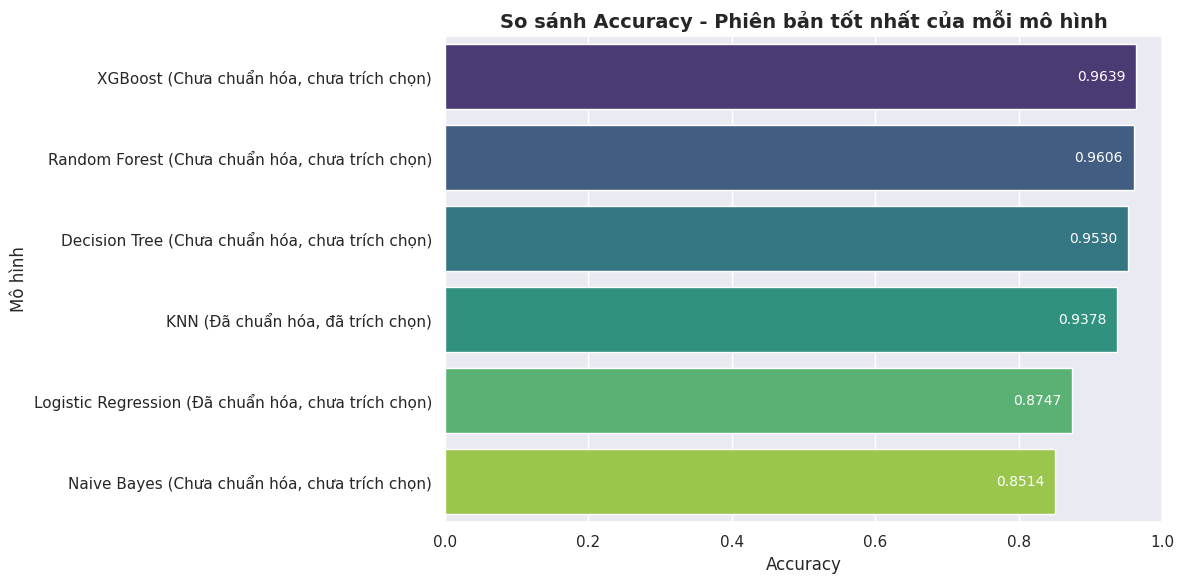

<ipython-input-55-366141cb4746>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='display_name', x=metric, data=data_sorted, palette='viridis')


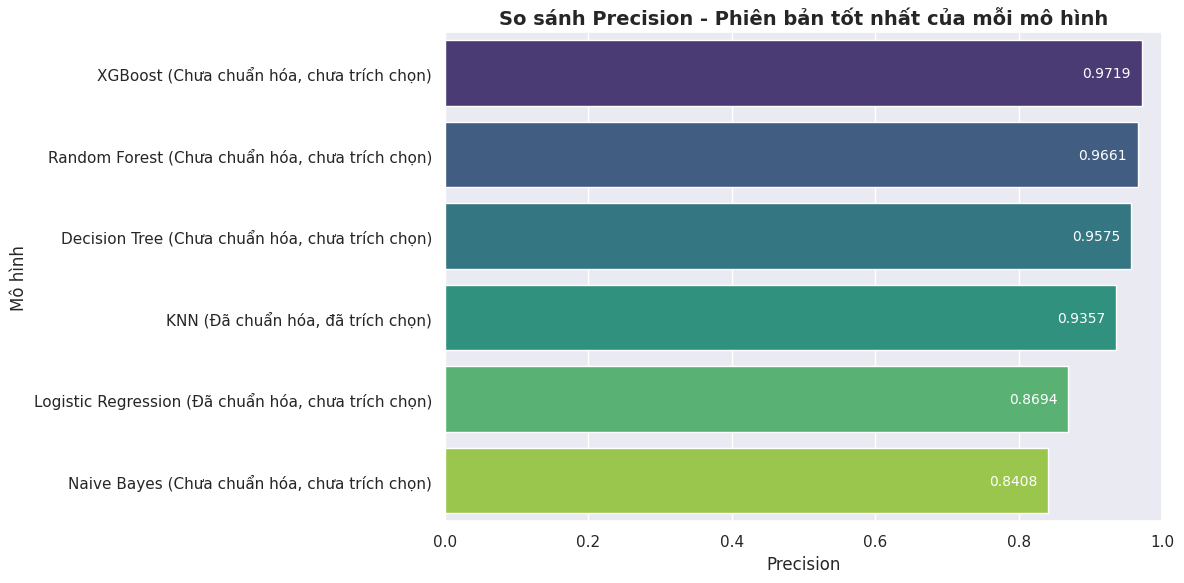

<ipython-input-55-366141cb4746>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='display_name', x=metric, data=data_sorted, palette='viridis')


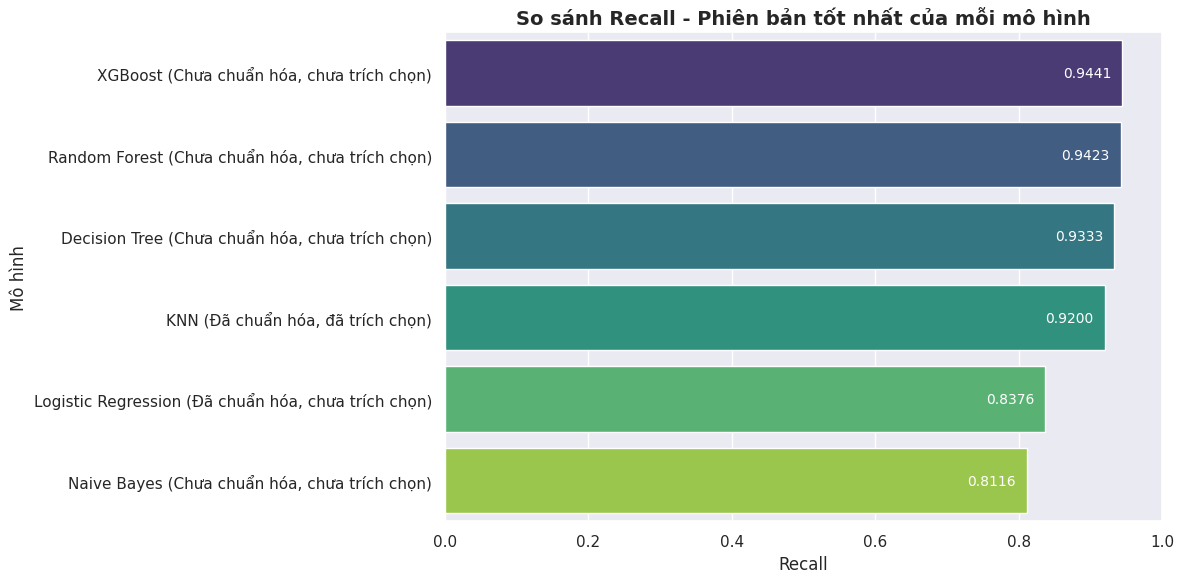

<ipython-input-55-366141cb4746>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='display_name', x=metric, data=data_sorted, palette='viridis')


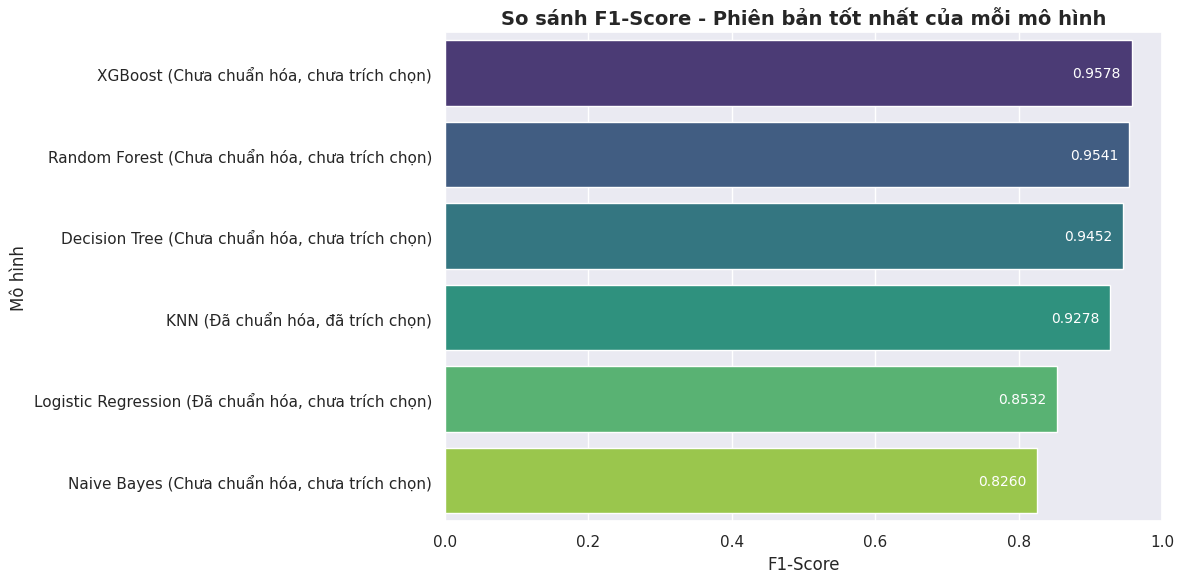

<ipython-input-55-366141cb4746>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='display_name', x=metric, data=data_sorted, palette='viridis')


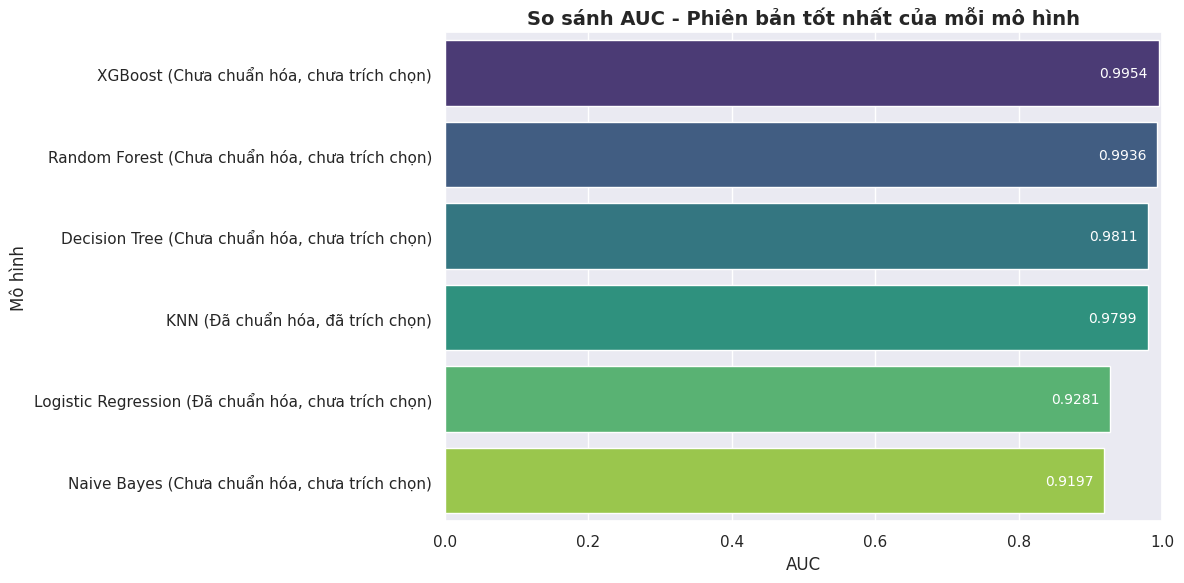

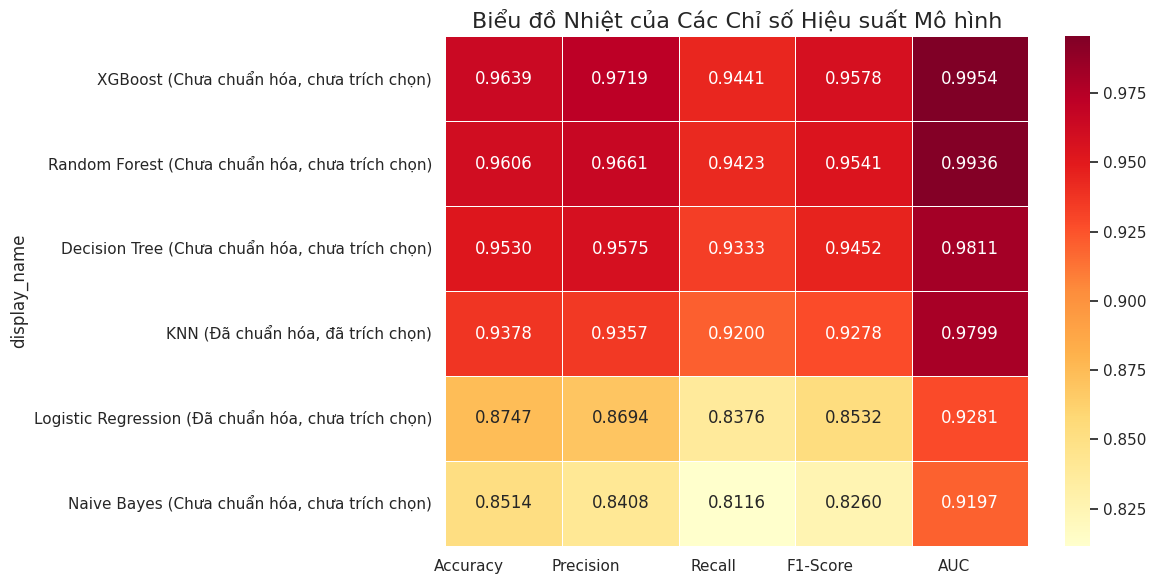

In [ ]:
# Định nghĩa các tên mô hình cơ bản
model_types = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'XGBoost', 'KNN']

# Tạo danh sách để lưu trường hợp tốt nhất cho mỗi mô hình
best_scenarios_list = []

# Với mỗi loại mô hình, tìm trường hợp có AUC cao nhất
for model_type in model_types:
    # Lọc các hàng cho loại mô hình hiện tại
    model_rows = results_df[results_df['model'].str.contains(model_type)]

    # Kiểm tra xem model_rows có rỗng không
    if model_rows.empty:
        print(f"Warning: No results found for {model_type}. Skipping...")
        continue  # Bỏ qua nếu không tìm thấy kết quả

    # Tìm hàng có AUC cao nhất cho loại mô hình này
    best_idx = model_rows['auc'].idxmax()
    best_row = model_rows.loc[best_idx].copy()

    # Tách tên mô hình và trường hợp
    full_model_name = best_row['model']
    scenario = full_model_name.split('(')[1].replace(')', '').strip()

    # Thêm thông tin về mô hình và trường hợp
    best_row['base_model'] = model_type
    best_row['scenario'] = scenario

    # Tạo tên hiển thị mới có chứa cả tên mô hình và trường hợp
    best_row['display_name'] = f"{model_type} ({scenario})"

    # Đổi tên cột để dễ đọc hơn
    best_row['accuracy_score'] = best_row['accuracy']
    best_row['precision_score'] = best_row['precision']
    best_row['recall_score'] = best_row['recall']
    best_row['f1_score'] = best_row['f1']
    best_row['auc_score'] = best_row['auc']

    best_scenarios_list.append(best_row)

# Tạo DataFrame mới với các trường hợp tốt nhất
best_scenarios = pd.DataFrame(best_scenarios_list)

# Chọn và sắp xếp các cột cần thiết
cols_to_show = ['display_name', 'accuracy_score', 'precision_score',
                'recall_score', 'f1_score', 'auc_score']

best_scenarios_display = best_scenarios[cols_to_show].copy()

# Sắp xếp theo AUC giảm dần
best_scenarios_display = best_scenarios_display.sort_values(by='auc_score', ascending=False)

# Hiển thị kết quả
print("BẢNG TÓM TẮT PHIÊN BẢN TỐT NHẤT CỦA MỖI MÔ HÌNH:")
print(best_scenarios_display.rename(columns={
    'display_name': 'Mô hình',
    'accuracy_score': 'Accuracy',
    'precision_score': 'Precision',
    'recall_score': 'Recall',
    'f1_score': 'F1-Score',
    'auc_score': 'AUC'
}).to_string(index=False))

# Cài đặt kiểu để dễ đọc hơn
sns.set_theme()
# Các chỉ số để trực quan hóa
metrics = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'auc_score']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

# 1. Biểu đồ Cột cho Mỗi Chỉ số Đánh Giá
for metric, metric_label in zip(metrics, metric_labels):
    # Sắp xếp giảm dần theo giá trị của metric
    data_sorted = best_scenarios_display.sort_values(by=metric, ascending=False)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(y='display_name', x=metric, data=data_sorted, palette='viridis')

    # Tiêu đề và nhãn trục
    plt.title(f'So sánh {metric_label} - Phiên bản tốt nhất của mỗi mô hình', fontsize=14, fontweight='bold')
    plt.xlabel(metric_label, fontsize=12)
    plt.ylabel('Mô hình', fontsize=12)

    # Thêm nhãn giá trị lên cột
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.4f}',
                   (width - 0.015 if width > 0.05 else width + 0.01,
                    p.get_y() + p.get_height() / 2.),
                   ha='right' if width > 0.05 else 'left',
                   va='center',
                   fontsize=10,
                   color='white' if width > 0.5 else 'black')

    plt.xlim(0, 1.0)
    plt.tight_layout()
    plt.show()

# 3. Biểu đồ Nhiệt cho các metric
plt.figure(figsize=(12,6))
heatmap_data = best_scenarios_display.set_index('display_name')[metrics]
heatmap_data.columns = metric_labels  # Đổi tên cột cho đẹp

sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.4f', linewidths=0.5, annot_kws={"size": 12})
plt.title('Biểu đồ Nhiệt của Các Chỉ số Hiệu suất Mô hình', fontsize=16)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# Hiển thị thông tin cụ thể cho mô hình tốt nhất
best_model_info = best_scenarios_display.iloc[0]
print(f"\n===== THÔNG TIN MÔ HÌNH TỐT NHẤT =====")
print(f"Mô hình: {best_model_info['display_name']}") # Changed 'model' to 'display_name'
print(f"Accuracy: {best_model_info['accuracy_score']:.4f}")
print(f"Precision: {best_model_info['precision_score']:.4f}")
print(f"Recall: {best_model_info['recall_score']:.4f}")
print(f"F1-Score: {best_model_info['f1_score']:.4f}")
print(f"AUC: {best_model_info['auc_score']:.4f}")



===== THÔNG TIN MÔ HÌNH TỐT NHẤT =====
Mô hình: XGBoost (Chưa chuẩn hóa, chưa trích chọn)
Accuracy: 0.9639
Precision: 0.9719
Recall: 0.9441
F1-Score: 0.9578
AUC: 0.9954


## kiểm tra ovtf

In [ ]:
# Danh sách các biến huấn luyện và kiểm tra theo từng trường hợp
scenarios = [
    {
        'name': 'Chưa chuẩn hóa, chưa trích chọn',
        'X_train': X_train,
        'X_test': X_test,
        'color': 'Blues'
    },
    {
        'name': 'Đã chuẩn hóa, chưa trích chọn',
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'color': 'Purples'
    },
    {
        'name': 'Chưa chuẩn hóa, đã trích chọn',
        'X_train': X_train_unscaled_selected,
        'X_test': X_test_unscaled_selected,
        'color': 'Oranges'
    },
    {
        'name': 'Đã chuẩn hóa, đã trích chọn',
        'X_train': X_train_scaled_selected,
        'X_test': X_test_scaled_selected,
        'color': 'Greens'
    }
]

# Lưu kết quả
kiem_tra_overfit = []

for model_name, model in models.items():
    for scenario in scenarios:
        print("\n" + "="*60)
        print(f"{model_name} - {scenario['name']}")
        print("="*60)

        # Huấn luyện
        start_time = time.time()
        model.fit(scenario['X_train'], y_train)
        train_time = time.time() - start_time

        # Dự đoán
        y_pred_train = model.predict(scenario['X_train'])
        y_pred_test = model.predict(scenario['X_test'])

        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        overfit_gap = train_acc - test_acc

        print(f"Thời gian huấn luyện: {train_time:.4f} giây")
        print(f"Độ chính xác (Train): {train_acc:.4f}")
        print(f"Độ chính xác (Test ): {test_acc:.4f}")
        print(f"Overfit Gap        : {overfit_gap:.4f}")

        # Lưu kết quả đánh giá
        result = evaluate_model(
            model,
            scenario['X_test'],
            y_test,
            f"{model_name} ({scenario['name']})",
            cmap_color=scenario['color']
        )
        result.update({
            'model_name': model_name,
            'scenario': scenario['name'],
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'overfit_gap': overfit_gap,
            'train_time': train_time
        })
        kiem_tra_overfit.append(result)

# Tạo bảng kết quả
kiem_tra_overfit_df = pd.DataFrame(kiem_tra_overfit)


Decision Tree - Chưa chuẩn hóa, chưa trích chọn
Thời gian huấn luyện: 1.3201 giây
Độ chính xác (Train): 0.9686
Độ chính xác (Test ): 0.9530
Overfit Gap        : 0.0156

===== KẾT QUẢ MÔ HÌNH DECISION TREE (CHƯA CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.9530
Độ chuẩn xác (Precision): 0.9575
Độ nhạy (Recall): 0.9333
Điểm F1 (F1-Score): 0.9452
AUC: 0.9811
Testing time: 0.0117 giây

Decision Tree - Đã chuẩn hóa, chưa trích chọn
Thời gian huấn luyện: 0.6056 giây
Độ chính xác (Train): 0.9686
Độ chính xác (Test ): 0.9530
Overfit Gap        : 0.0156

===== KẾT QUẢ MÔ HÌNH DECISION TREE (ĐÃ CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.9530
Độ chuẩn xác (Precision): 0.9575
Độ nhạy (Recall): 0.9333
Điểm F1 (F1-Score): 0.9452
AUC: 0.9811
Testing time: 0.0071 giây

Decision Tree - Chưa chuẩn hóa, đã trích chọn
Thời gian huấn luyện: 0.3262 giây
Độ chính xác (Train): 0.9576
Độ chính xác (Test ): 0.9464
Overfit Gap        : 0.0111

===== KẾT QUẢ MÔ HÌNH DECISION TRE

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thời gian huấn luyện: 36.5602 giây
Độ chính xác (Train): 0.8691
Độ chính xác (Test ): 0.8700
Overfit Gap        : -0.0009

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (CHƯA CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8700
Độ chuẩn xác (Precision): 0.8579
Độ nhạy (Recall): 0.8398
Điểm F1 (F1-Score): 0.8488
AUC: 0.9254
Testing time: 0.0109 giây

Logistic Regression - Đã chuẩn hóa, chưa trích chọn
Thời gian huấn luyện: 1.7461 giây
Độ chính xác (Train): 0.8745
Độ chính xác (Test ): 0.8747
Overfit Gap        : -0.0002

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (ĐÃ CHUẨN HÓA, CHƯA TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8747
Độ chuẩn xác (Precision): 0.8694
Độ nhạy (Recall): 0.8376
Điểm F1 (F1-Score): 0.8532
AUC: 0.9281
Testing time: 0.0034 giây

Logistic Regression - Chưa chuẩn hóa, đã trích chọn


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thời gian huấn luyện: 34.6962 giây
Độ chính xác (Train): 0.8628
Độ chính xác (Test ): 0.8620
Overfit Gap        : 0.0007

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (CHƯA CHUẨN HÓA, ĐÃ TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8620
Độ chuẩn xác (Precision): 0.8497
Độ nhạy (Recall): 0.8291
Điểm F1 (F1-Score): 0.8393
AUC: 0.9186
Testing time: 0.0059 giây

Logistic Regression - Đã chuẩn hóa, đã trích chọn
Thời gian huấn luyện: 1.5521 giây
Độ chính xác (Train): 0.8626
Độ chính xác (Test ): 0.8622
Overfit Gap        : 0.0005

===== KẾT QUẢ MÔ HÌNH LOGISTIC REGRESSION (ĐÃ CHUẨN HÓA, ĐÃ TRÍCH CHỌN) =====
Độ chính xác (Accuracy): 0.8622
Độ chuẩn xác (Precision): 0.8498
Độ nhạy (Recall): 0.8293
Điểm F1 (F1-Score): 0.8394
AUC: 0.9185
Testing time: 0.0109 giây

Naive Bayes - Chưa chuẩn hóa, chưa trích chọn
Thời gian huấn luyện: 0.0742 giây
Độ chính xác (Train): 0.8512
Độ chính xác (Test ): 0.8514
Overfit Gap        : -0.0002

===== KẾT QUẢ MÔ HÌNH NAIVE BAYES (CHƯA CHUẨN HÓA, CHƯA TRÍCH CHỌN) =